In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_path = "/kaggle/input/house-prices-advanced-regression-techniques/train.csv"
train_df = pd.read_csv(train_path)

train_info = train_df.info()
trainda = train_df.describe()

train_head = train_df.head()

train_info, trainda, train_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(None,
                 Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
 count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
 mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
 std     421.610009    42.300571    24.284752    9981.264932     1.382997   
 min       1.000000    20.000000    21.000000    1300.000000     1.000000   
 25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
 50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
 75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
 max    1460.000000   190.000000   313.000000  215245.000000    10.000000   
 
        OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
 count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
 mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
 std       1.112799    30.202904     20.645407   181.06

In [3]:
missing_data = train_df.isnull().sum()
missing_data_percentage = (missing_data / len(train_df)) * 100

missing_data_df = pd.DataFrame({
    'Column': train_df.columns,
    'Missing Values': missing_data,
    'Percentage (%)': missing_data_percentage
})

missing_data_df = missing_data_df[missing_data_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

missing_data_df


Column  Missing Values  Percentage (%)
PoolQC              PoolQC            1453       99.520548
MiscFeature    MiscFeature            1406       96.301370
Alley                Alley            1369       93.767123
Fence                Fence            1179       80.753425
MasVnrType      MasVnrType             872       59.726027
FireplaceQu    FireplaceQu             690       47.260274
LotFrontage    LotFrontage             259       17.739726
GarageType      GarageType              81        5.547945
GarageYrBlt    GarageYrBlt              81        5.547945
GarageFinish  GarageFinish              81        5.547945
GarageQual      GarageQual              81        5.547945
GarageCond      GarageCond              81        5.547945
BsmtFinType2  BsmtFinType2              38        2.602740
BsmtExposure  BsmtExposure              38        2.602740
BsmtFinType1  BsmtFinType1              37        2.534247
BsmtCond          BsmtCond              37        2.534247
BsmtQual          BsmtQual              37        2.534247
MasVnrArea      MasVnrArea               8        0.547945
Electrical      Electrical               1        0.068493

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


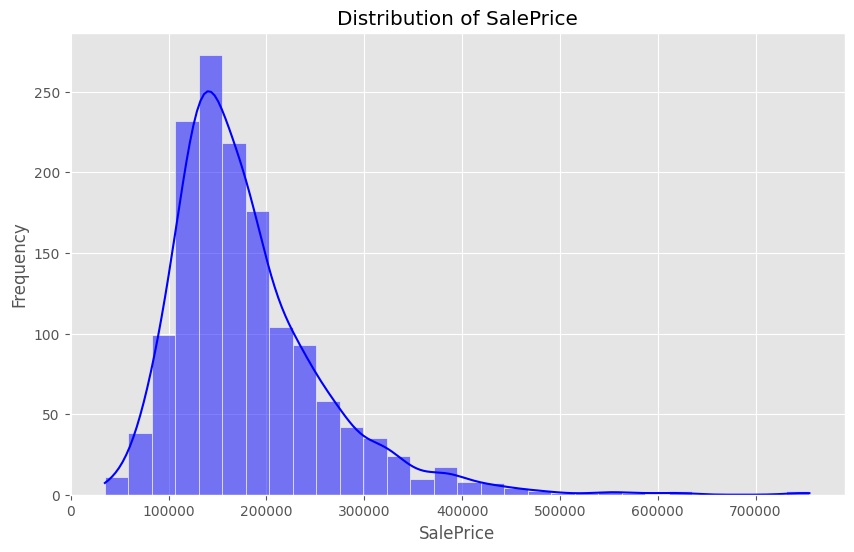

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True, color='blue', bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

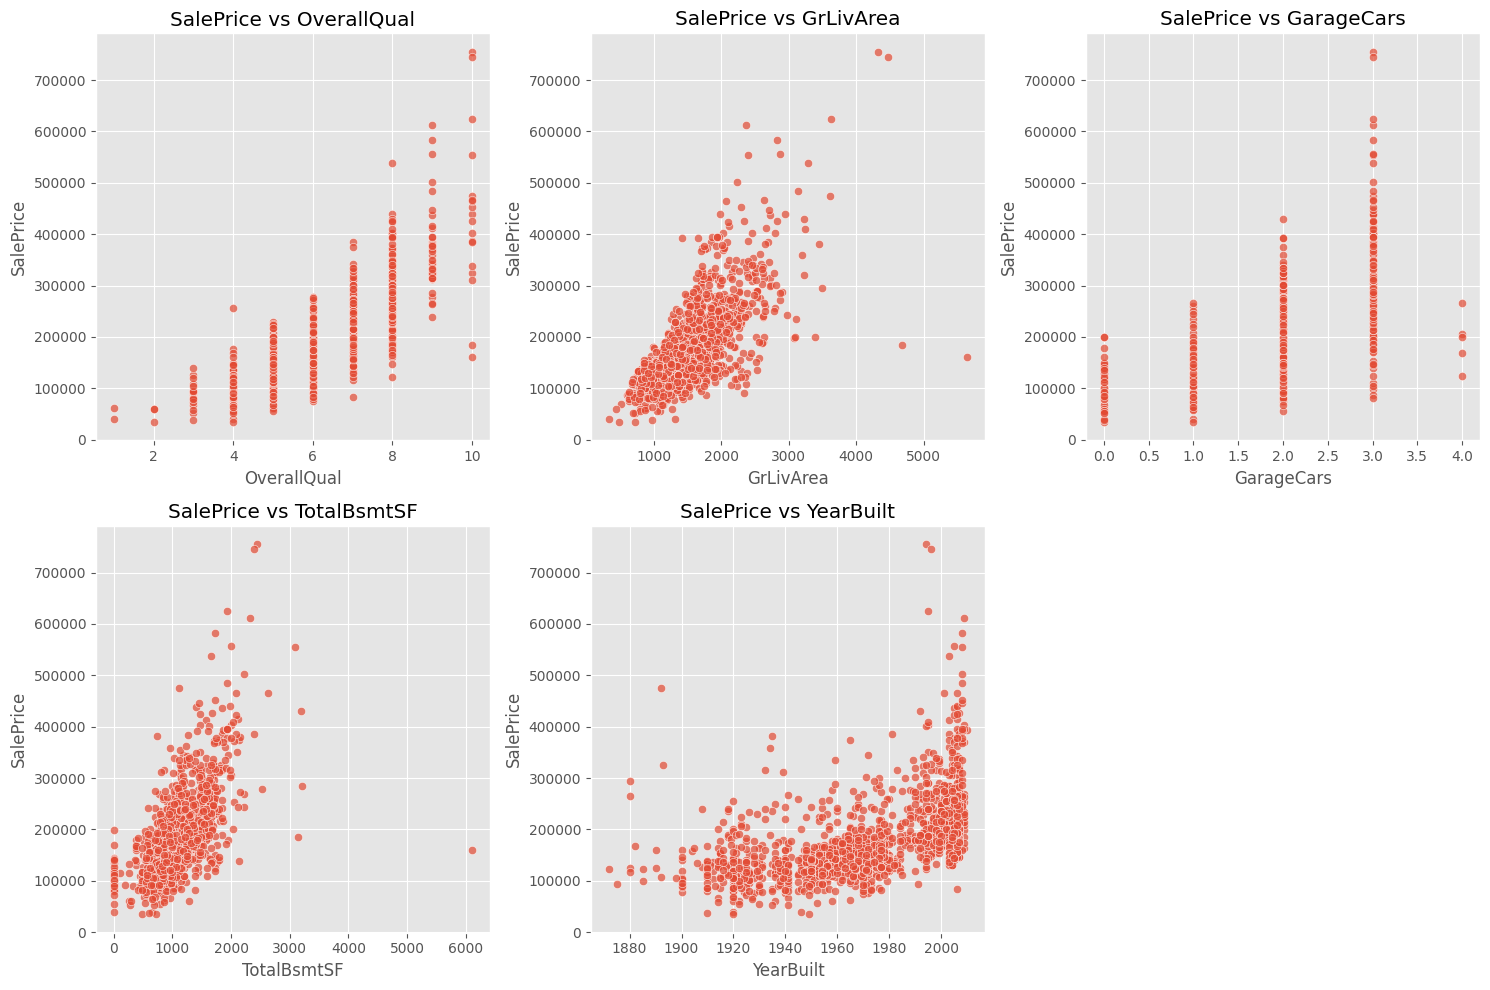

In [5]:
features_to_plot = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=train_df[feature], y=train_df['SalePrice'], alpha=0.7)
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

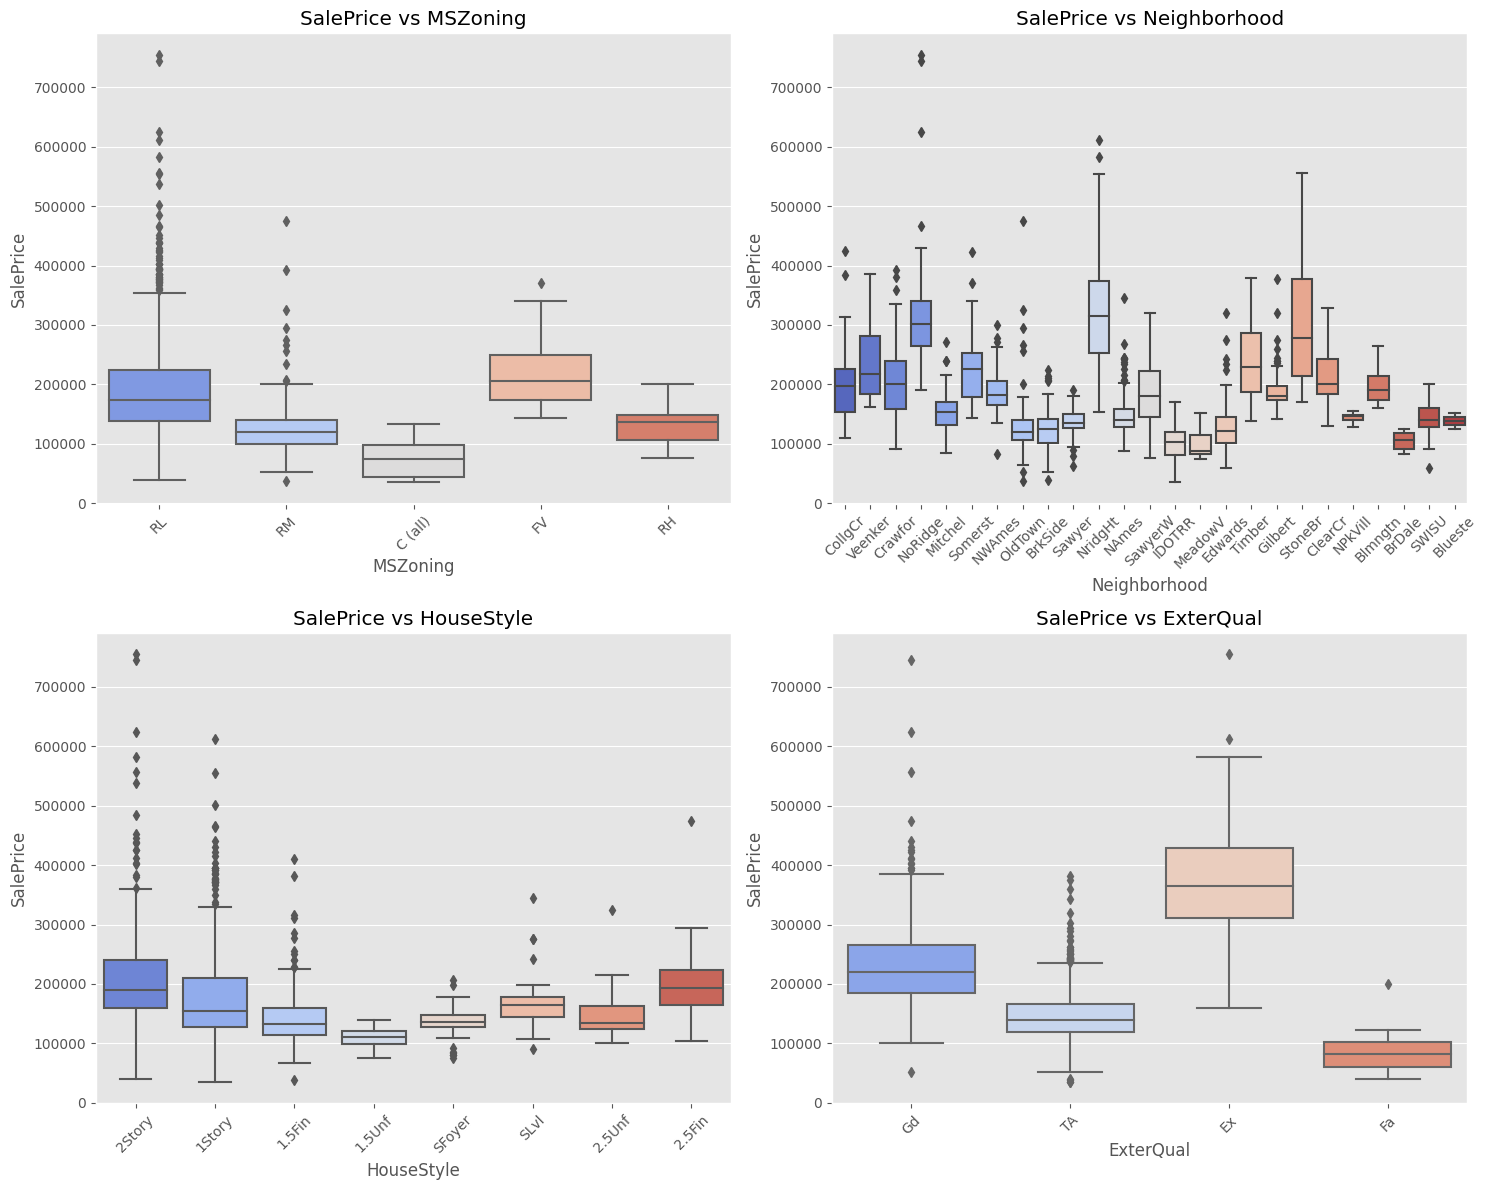

In [6]:
categorical_features = ['MSZoning', 'Neighborhood', 'HouseStyle', 'ExterQual']
plt.figure(figsize=(15, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train_df[feature], y=train_df['SalePrice'], palette='coolwarm')
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

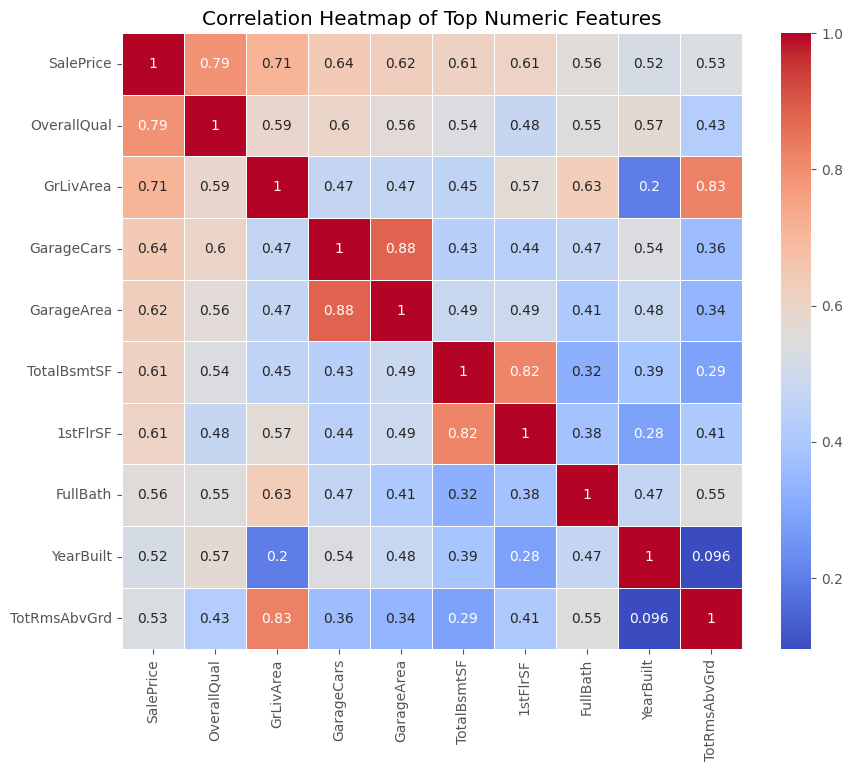

In [7]:
numeric_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 
                    'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'TotRmsAbvGrd']

corr_subset = train_df[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap of Top Numeric Features')
plt.show()

# **Visual Analysis**

Analysis 1-10

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

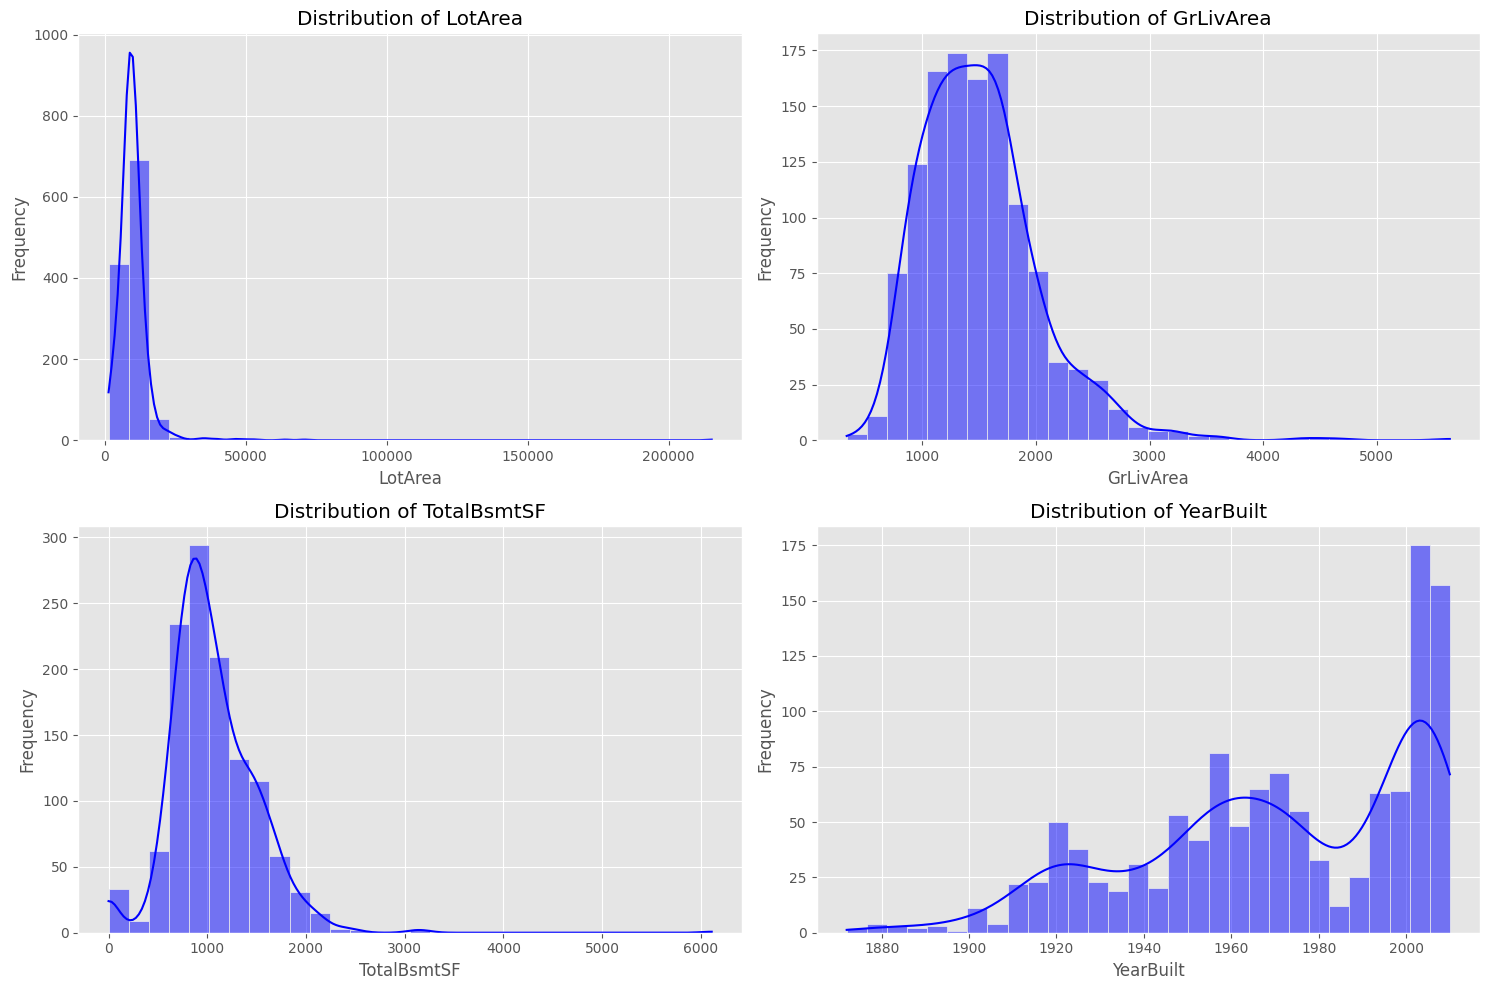

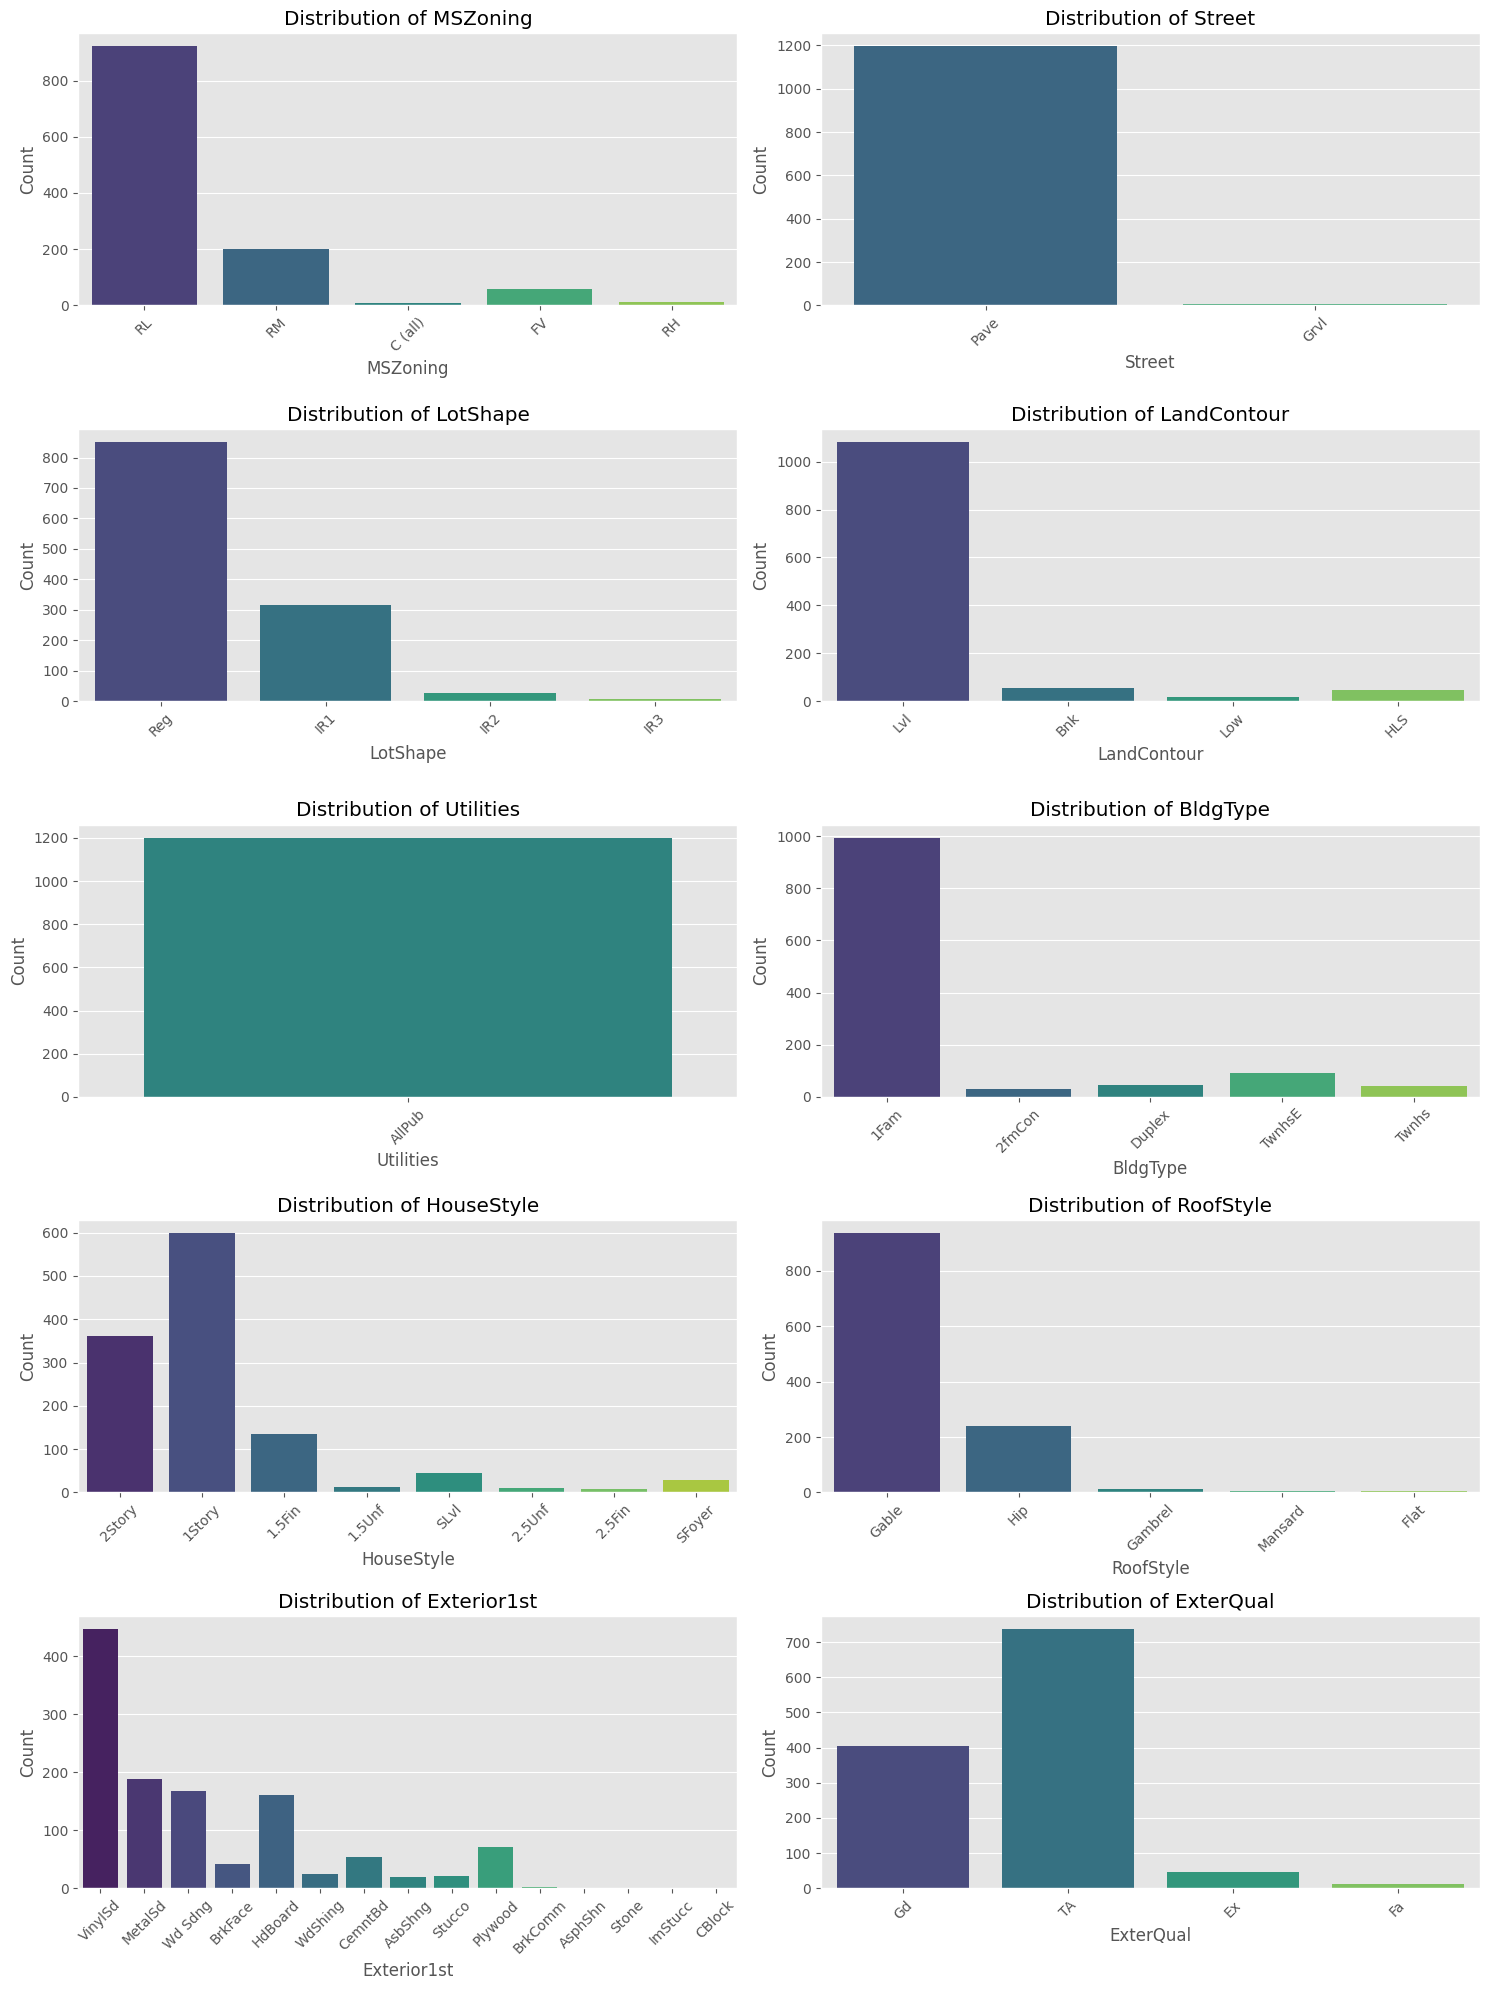

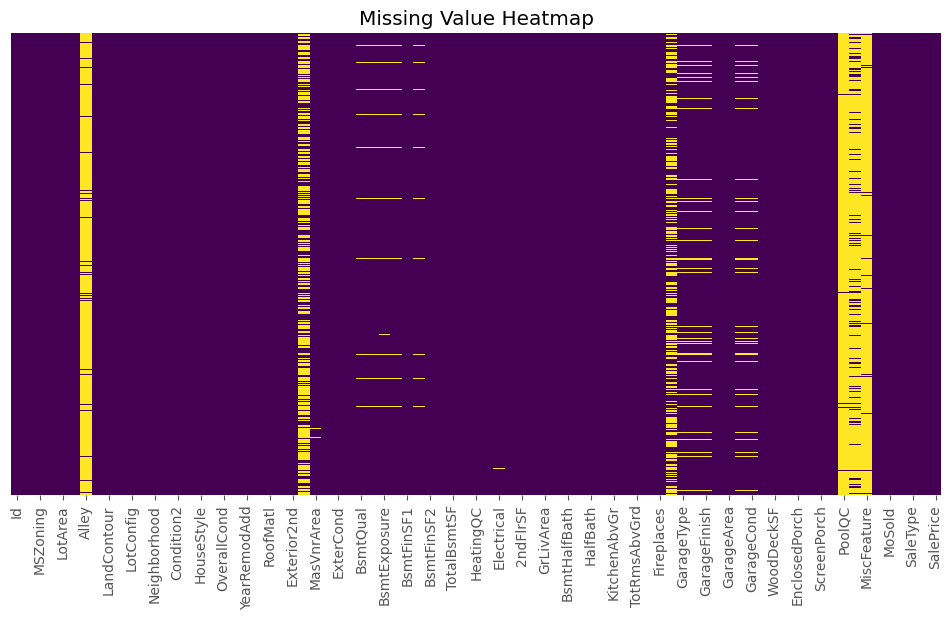

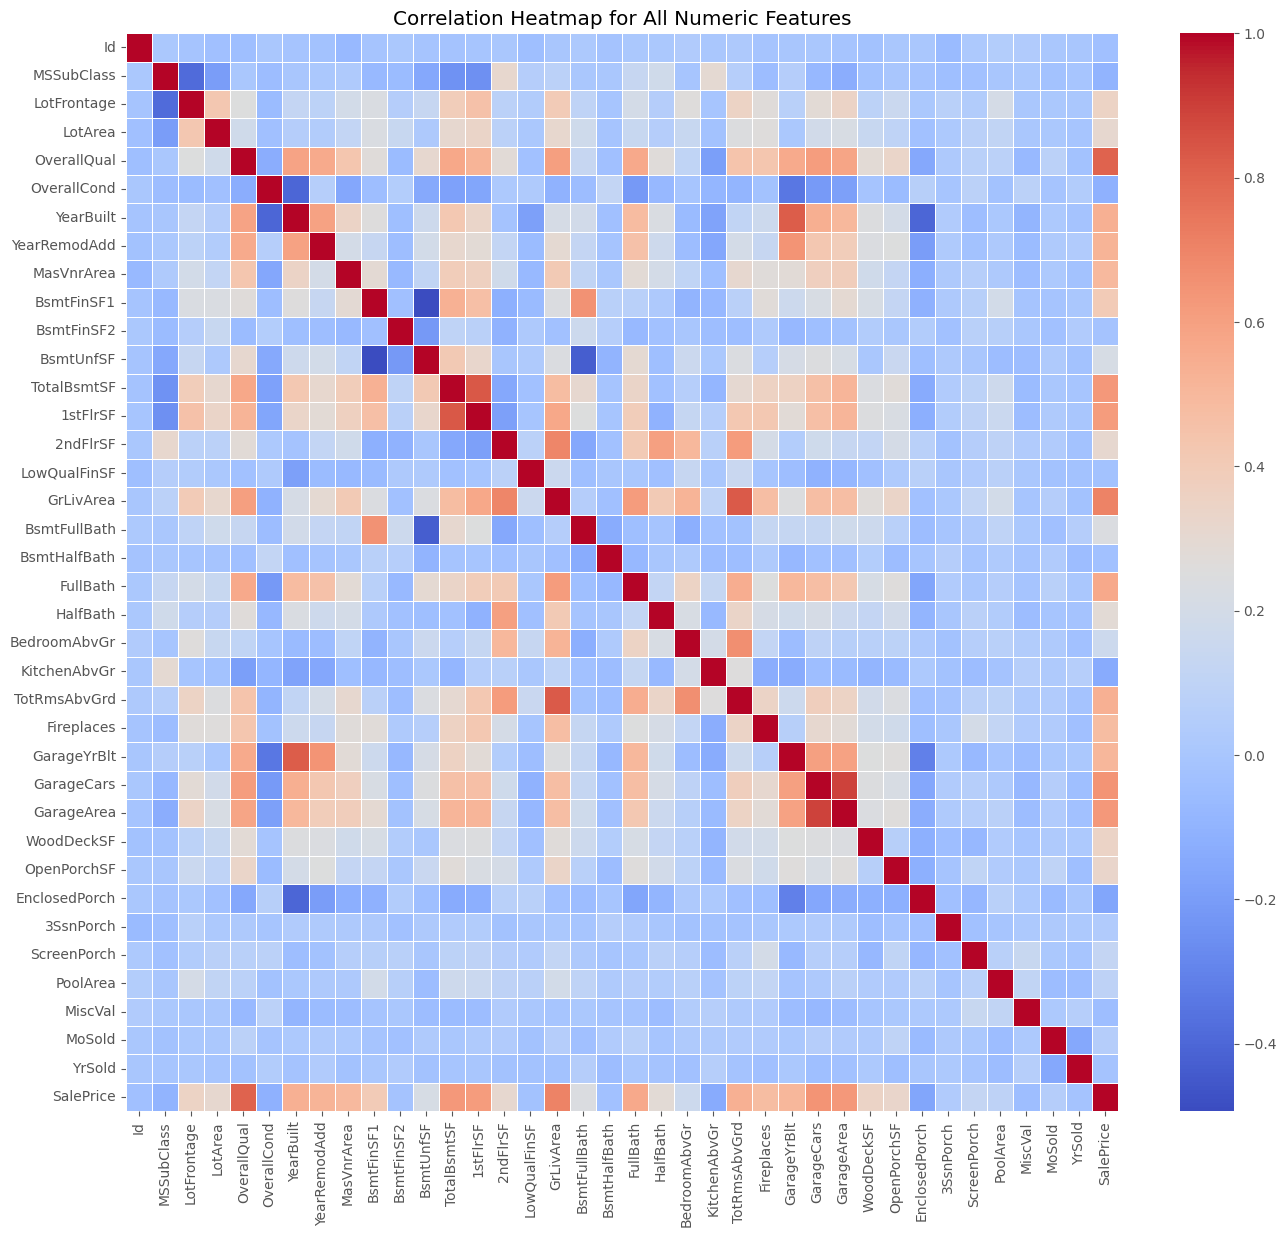

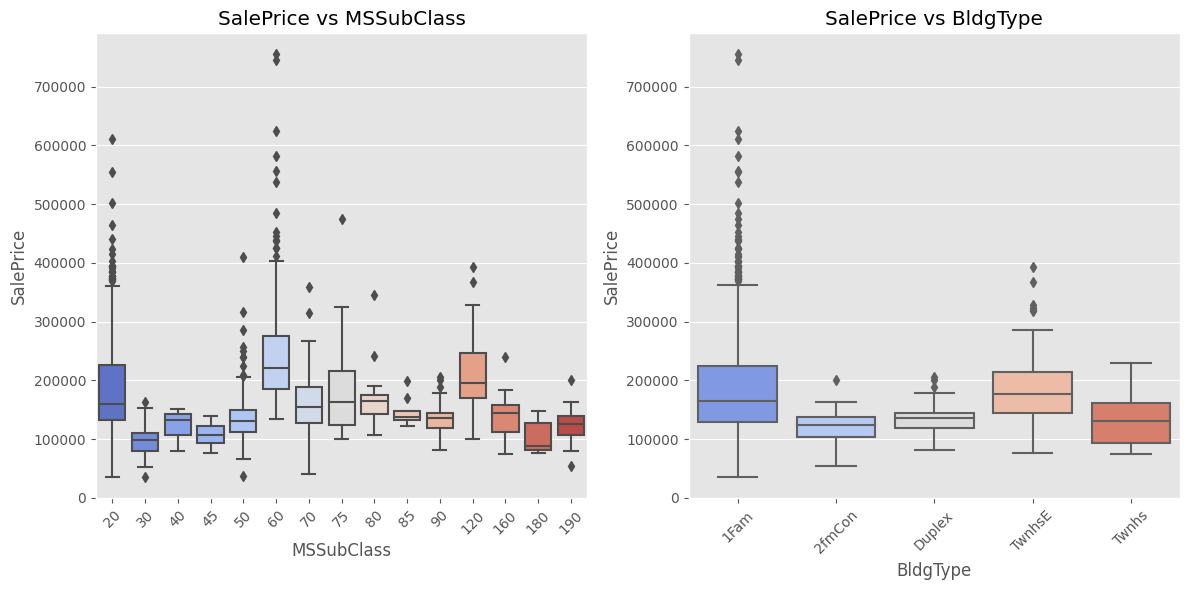

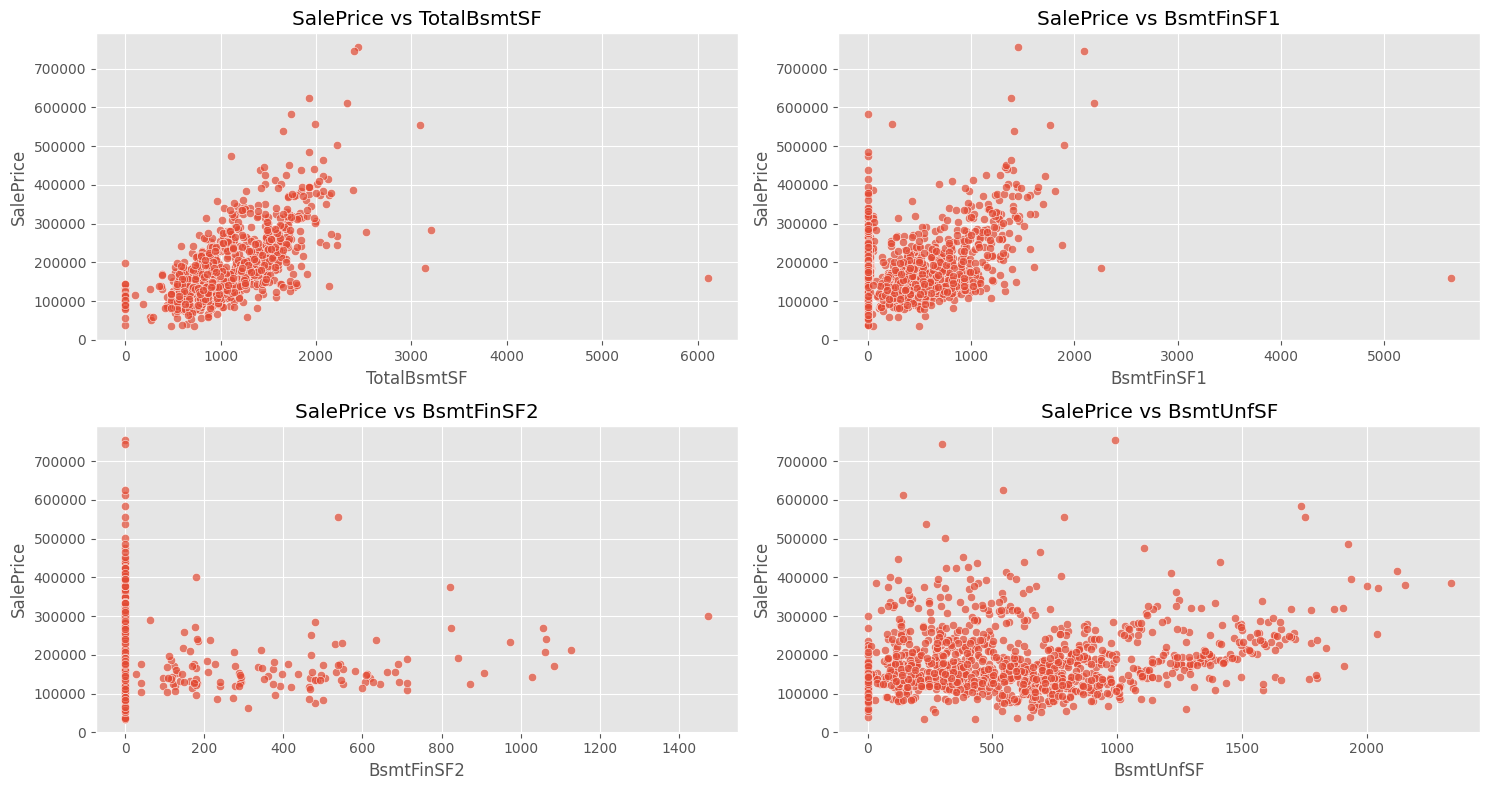

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

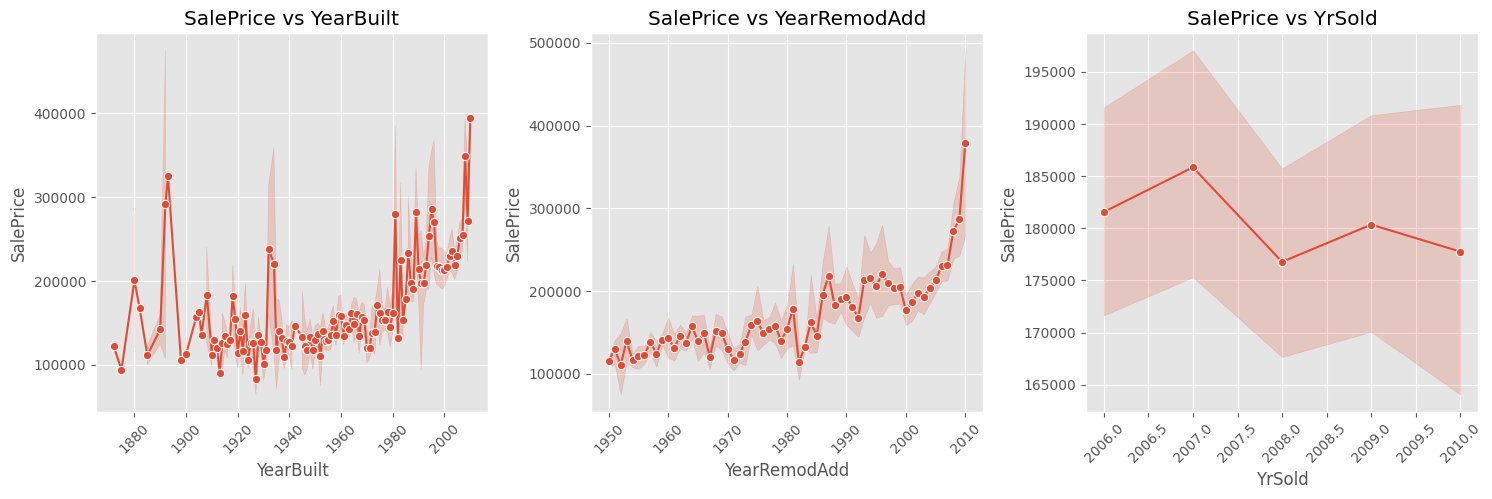

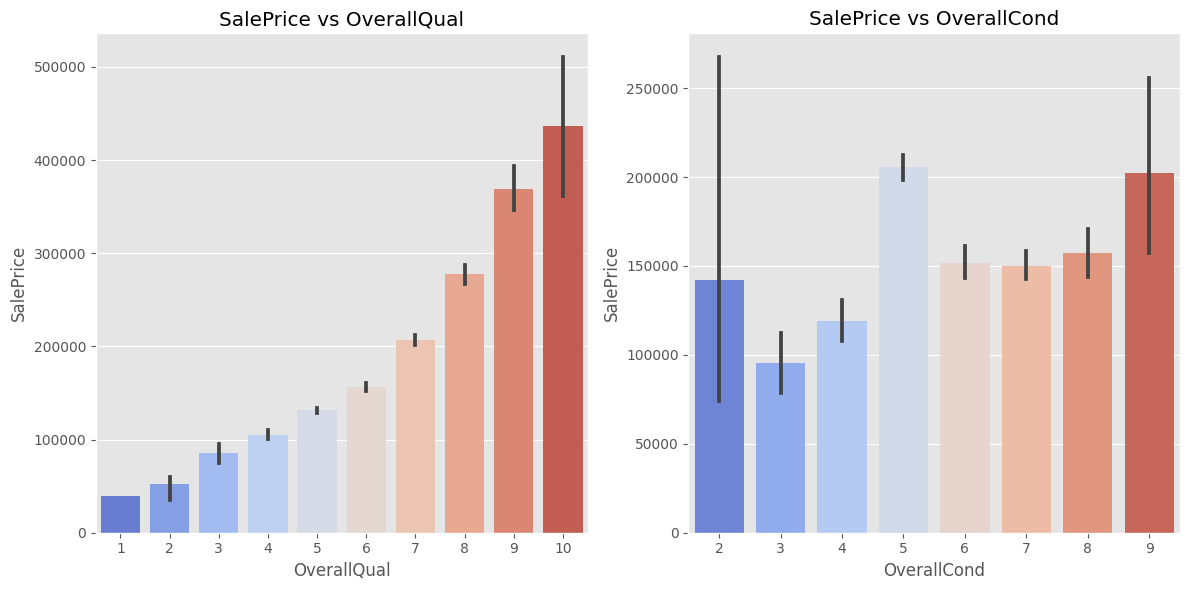

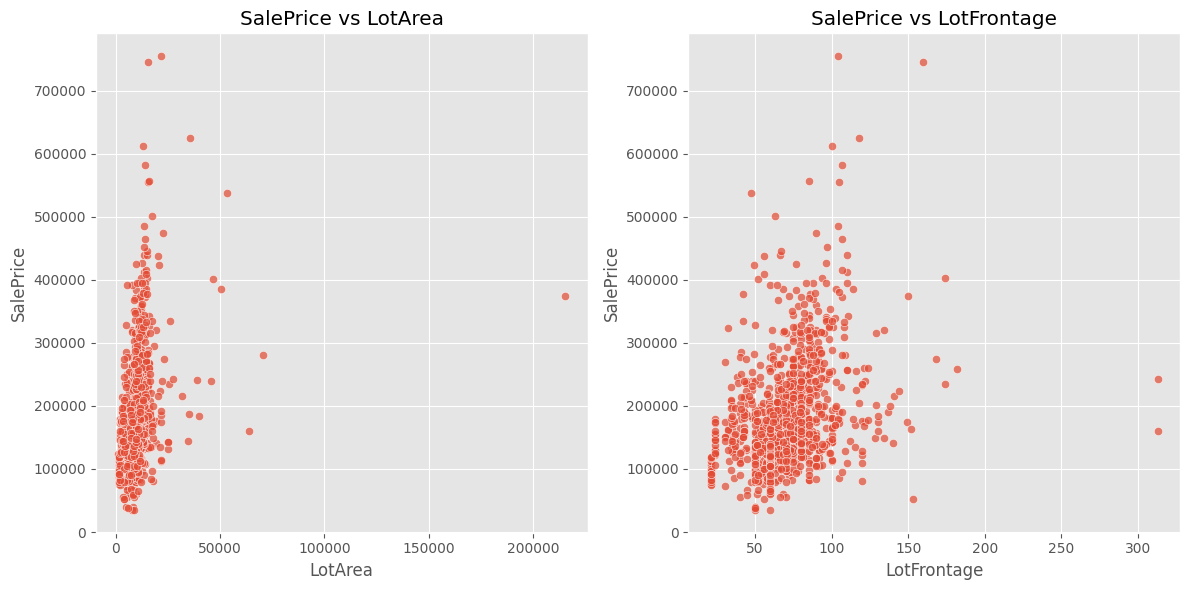

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

key_numeric_vars = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']
basement_features = ['TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
year_features = ['YearBuilt', 'YearRemodAdd', 'YrSold']
plot_columns = key_numeric_vars + basement_features + year_features + ['SalePrice', 'LotFrontage', 'OverallQual', 'OverallCond']

for col in plot_columns:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')

train_df = train_df.dropna(subset=plot_columns)

numericda = train_df.describe()

plt.figure(figsize=(15, 10))
for i, var in enumerate(key_numeric_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train_df[var], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 20))
categorical_features = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'ExterQual']
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    sns.countplot(x=train_df[feature], palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap')
plt.show()

numeric_df = train_df.select_dtypes(include=[float, int])

plt.figure(figsize=(16, 14))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap for All Numeric Features')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='MSSubClass', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs MSSubClass')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='BldgType', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs BldgType')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
for i, feature in enumerate(basement_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=train_df[feature], y=train_df['SalePrice'], alpha=0.7)
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, feature in enumerate(year_features, 1):
    plt.subplot(1, 3, i)
    sns.lineplot(x=train_df[feature], y=train_df['SalePrice'], marker='o')
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='OverallQual', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')

plt.subplot(1, 2, 2)
sns.barplot(x='OverallCond', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs OverallCond')
plt.xlabel('OverallCond')
plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=train_df['LotArea'], y=train_df['SalePrice'], alpha=0.7)
plt.title('SalePrice vs LotArea')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

plt.subplot(1, 2, 2)
sns.scatterplot(x=train_df['LotFrontage'], y=train_df['SalePrice'], alpha=0.7)
plt.title('SalePrice vs LotFrontage')
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

Analysis 11- 20

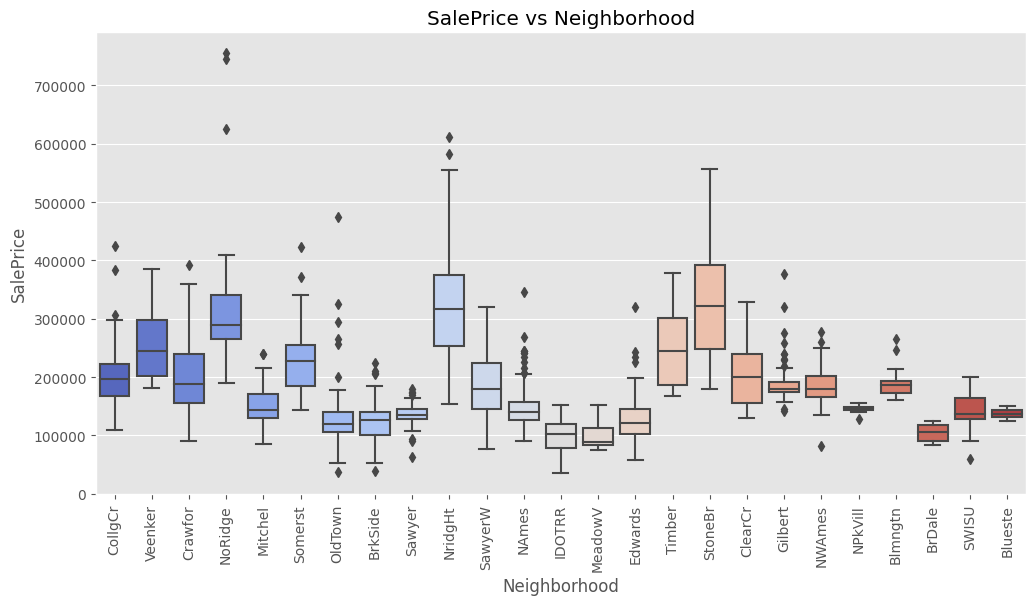

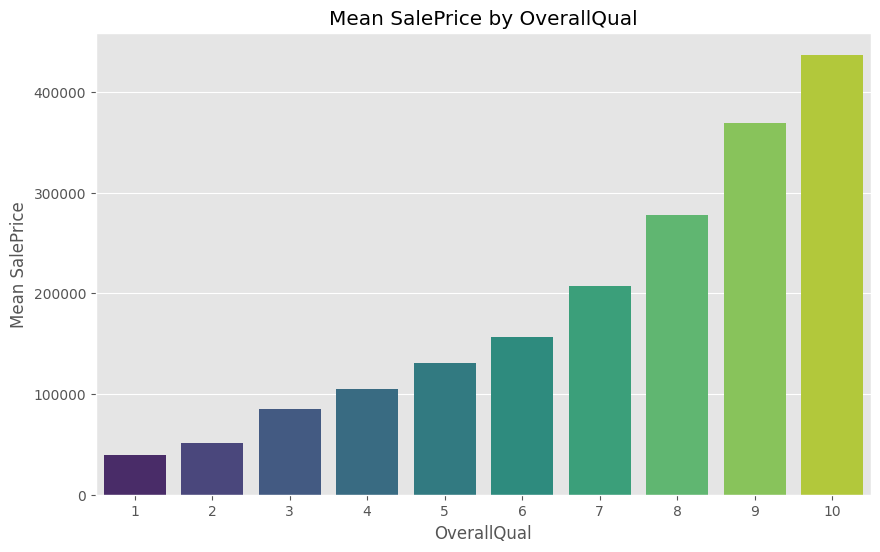

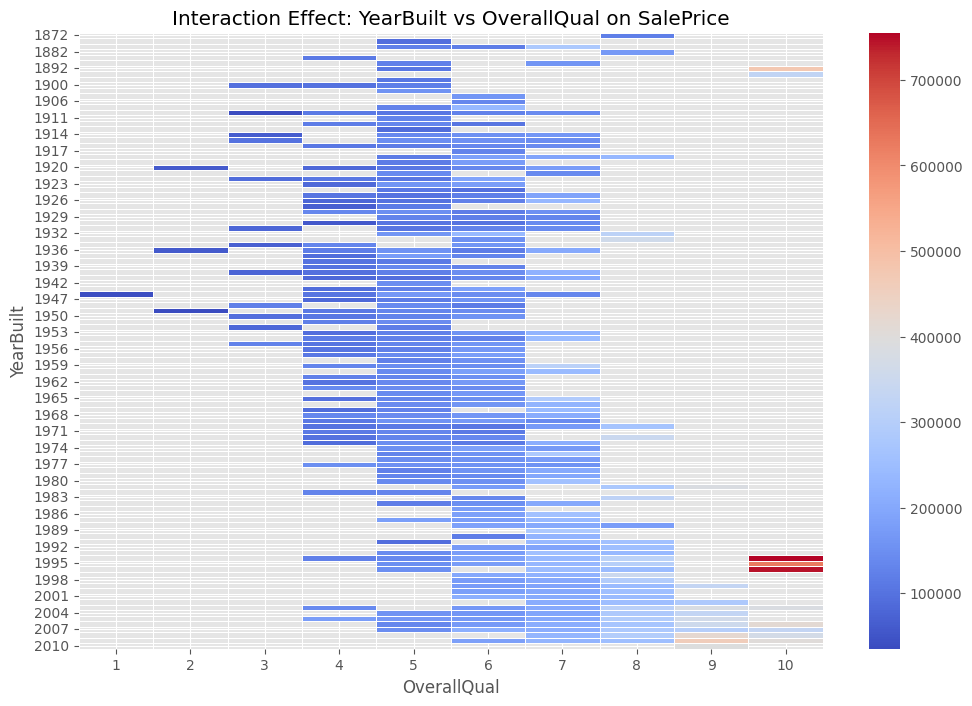

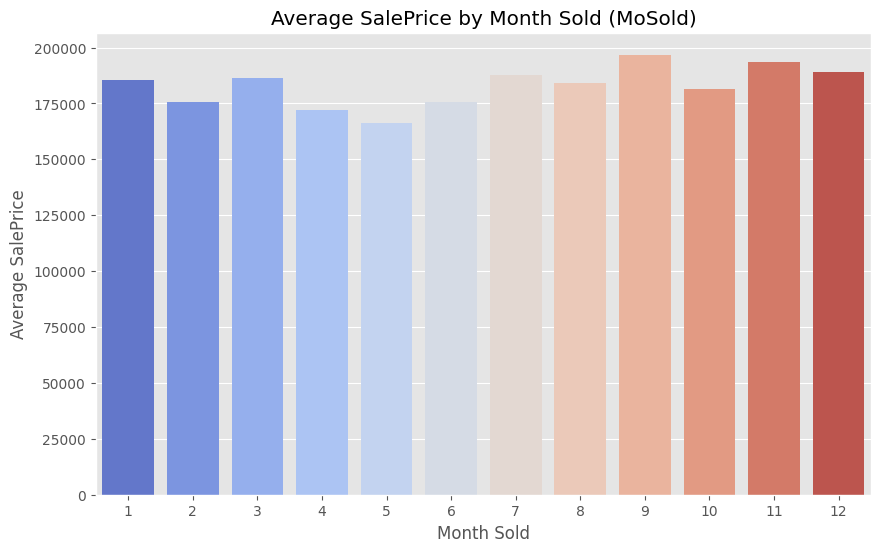

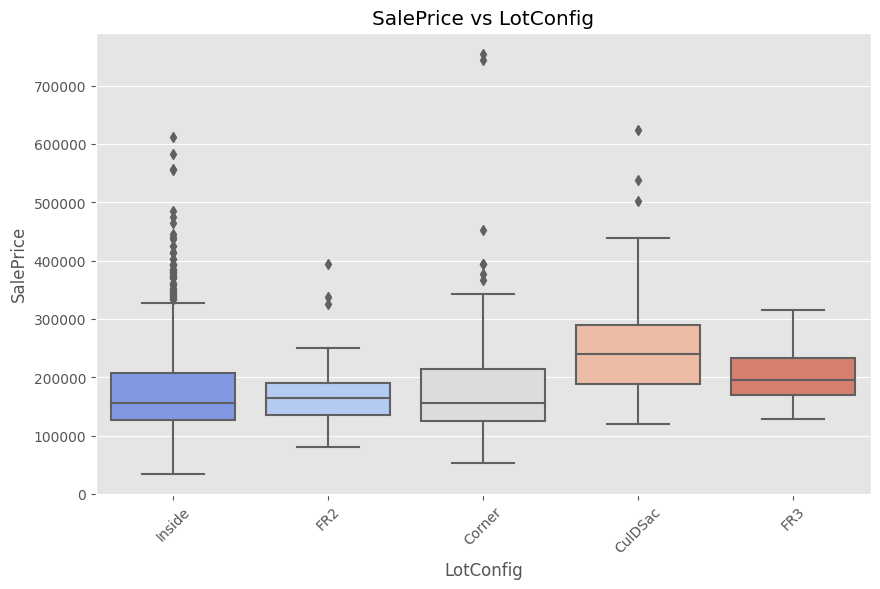

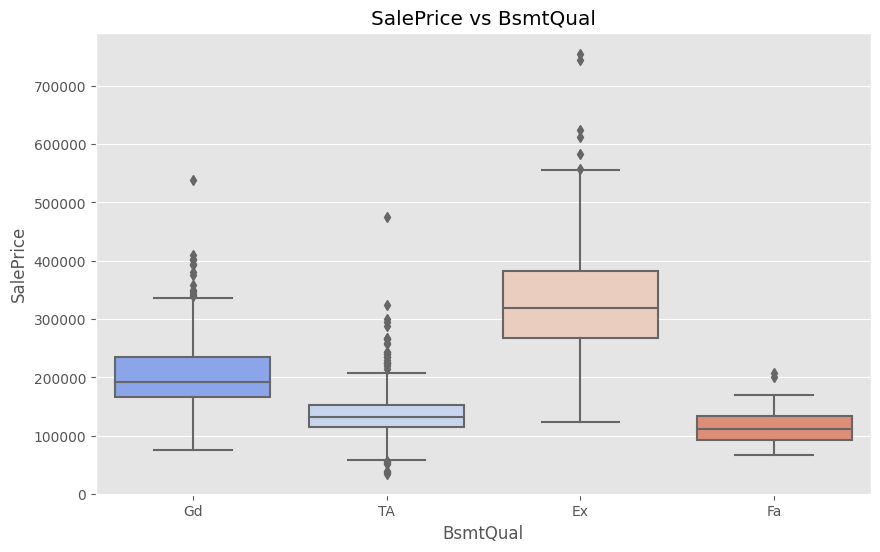

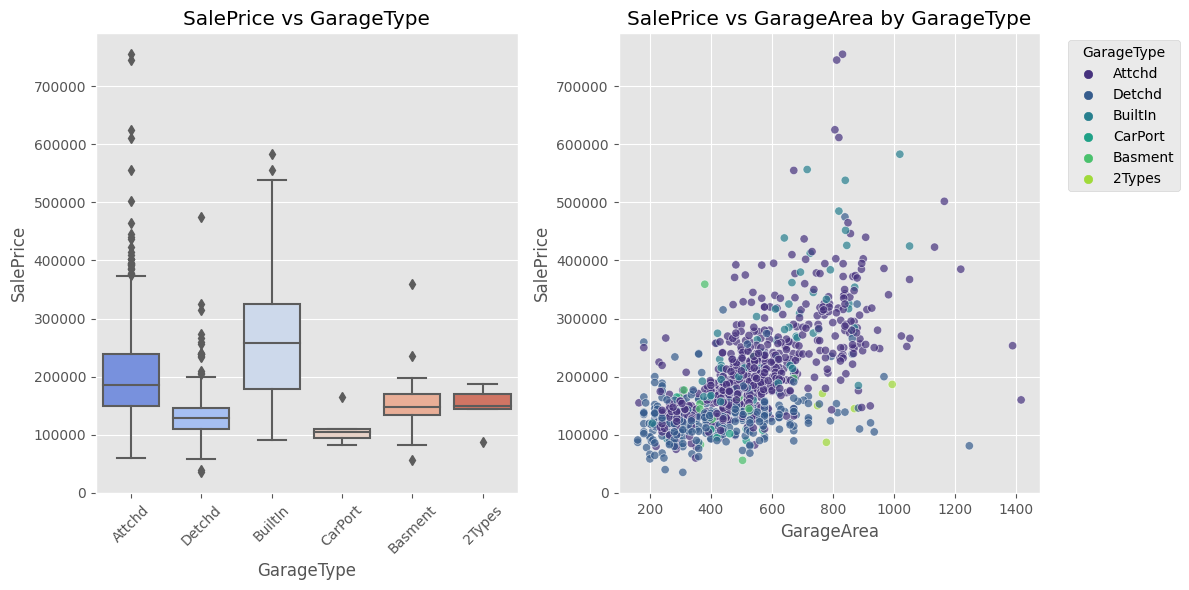

<Figure size 1000x600 with 0 Axes>

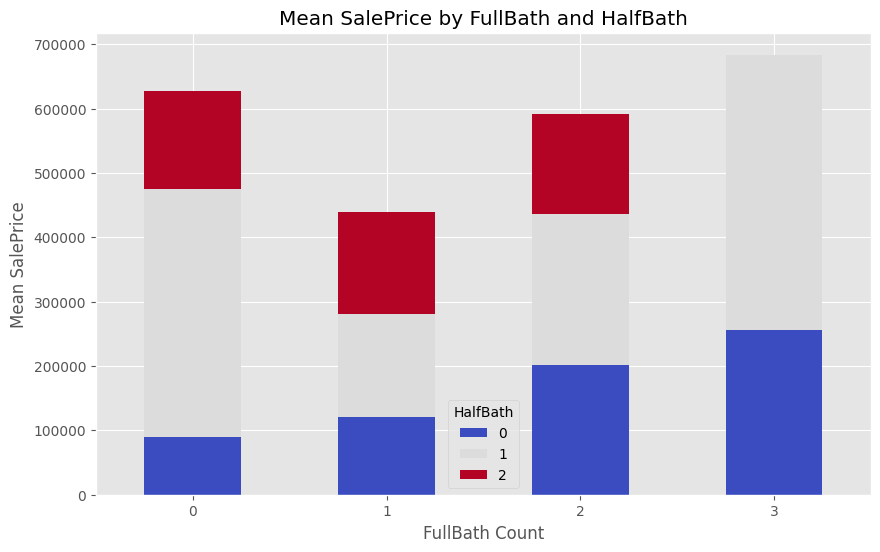

In [9]:
categoricalda = train_df.select_dtypes(include=['object']).describe()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.xticks(rotation=90)
plt.show()

from scipy.stats import f_oneway

neighborhood_groups = [group["SalePrice"].values for name, group in train_df.groupby("Neighborhood")]
anova_result = f_oneway(*neighborhood_groups)

overall_qual_means = train_df.groupby('OverallQual')['SalePrice'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=overall_qual_means.index, y=overall_qual_means.values, palette='viridis')
plt.title('Mean SalePrice by OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('Mean SalePrice')
plt.show()

plt.figure(figsize=(12, 8))
pivot_table = train_df.pivot_table(values='SalePrice', index='YearBuilt', columns='OverallQual', aggfunc='mean')
sns.heatmap(pivot_table, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Interaction Effect: YearBuilt vs OverallQual on SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('YearBuilt')
plt.show()

central_air_groups = train_df.groupby('CentralAir')['SalePrice']
t_test_result = central_air_groups.get_group('Y').mean(), central_air_groups.get_group('N').mean()

plt.figure(figsize=(10, 6))
month_mean_prices = train_df.groupby('MoSold')['SalePrice'].mean()
sns.barplot(x=month_mean_prices.index, y=month_mean_prices.values, palette='coolwarm')
plt.title('Average SalePrice by Month Sold (MoSold)')
plt.xlabel('Month Sold')
plt.ylabel('Average SalePrice')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='LotConfig', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs LotConfig')
plt.xlabel('LotConfig')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='BsmtQual', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs BsmtQual')
plt.xlabel('BsmtQual')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='GarageType', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs GarageType')
plt.xlabel('GarageType')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.scatterplot(x=train_df['GarageArea'], y=train_df['SalePrice'], hue=train_df['GarageType'], palette='viridis', alpha=0.7)
plt.title('SalePrice vs GarageArea by GarageType')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.legend(title='GarageType', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
bathroom_combinations = train_df.groupby(['FullBath', 'HalfBath'])['SalePrice'].mean().unstack()
bathroom_combinations.plot(kind='bar', stacked=True, cmap='coolwarm', figsize=(10, 6))
plt.title('Mean SalePrice by FullBath and HalfBath')
plt.xlabel('FullBath Count')
plt.ylabel('Mean SalePrice')
plt.xticks(rotation=0)
plt.show()

Analysis 21-30

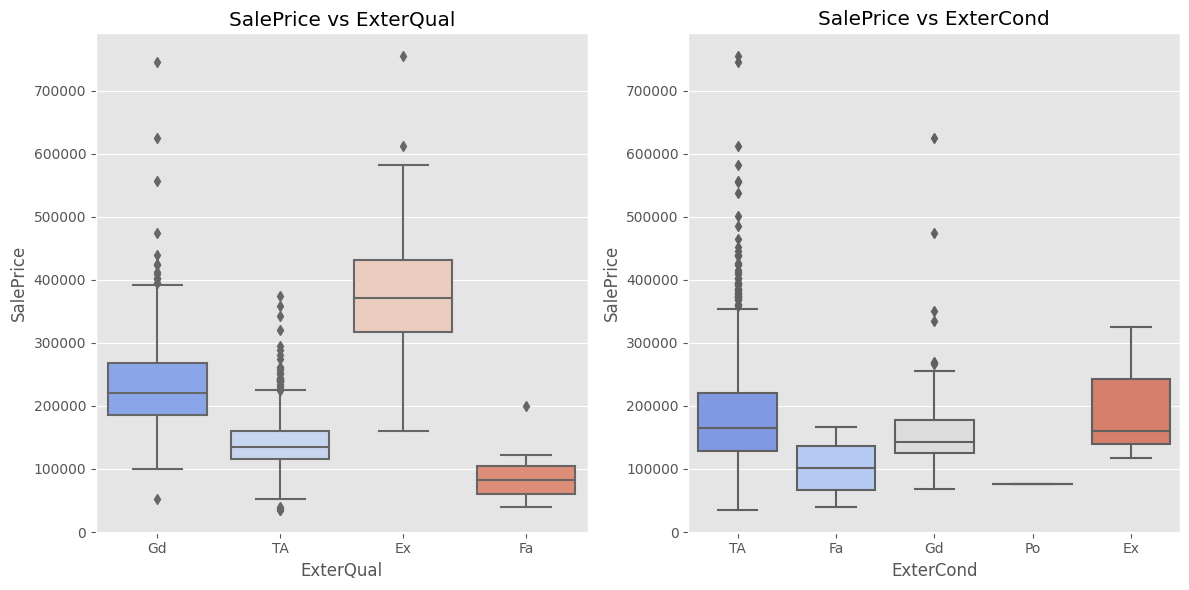

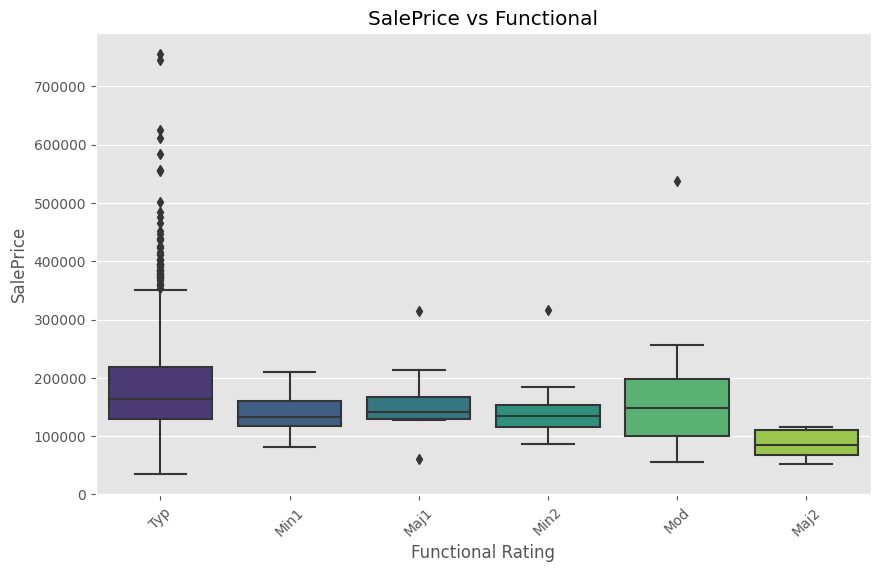

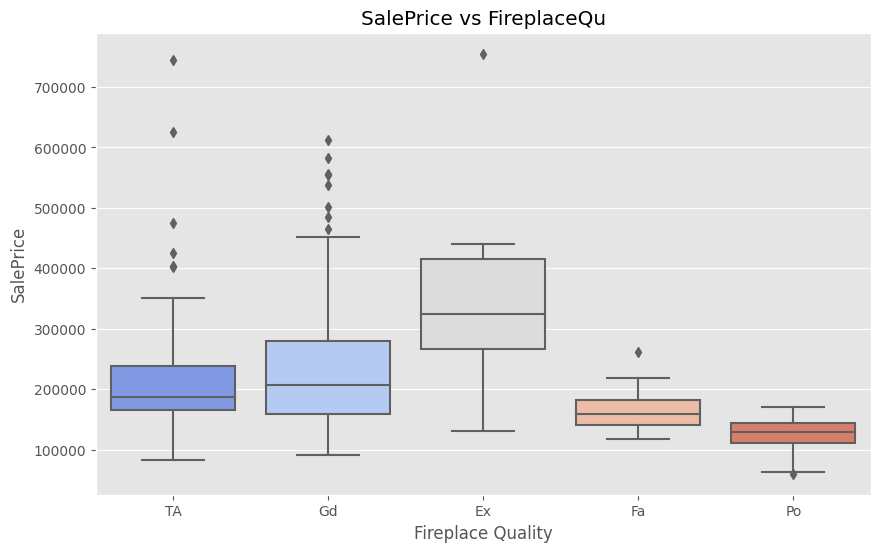

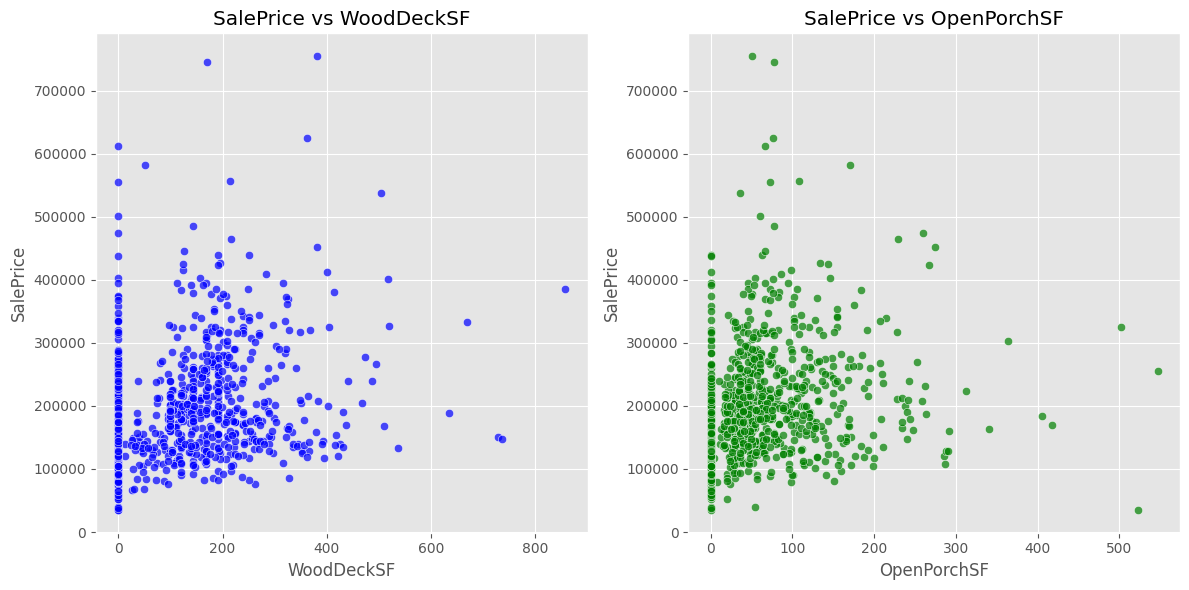

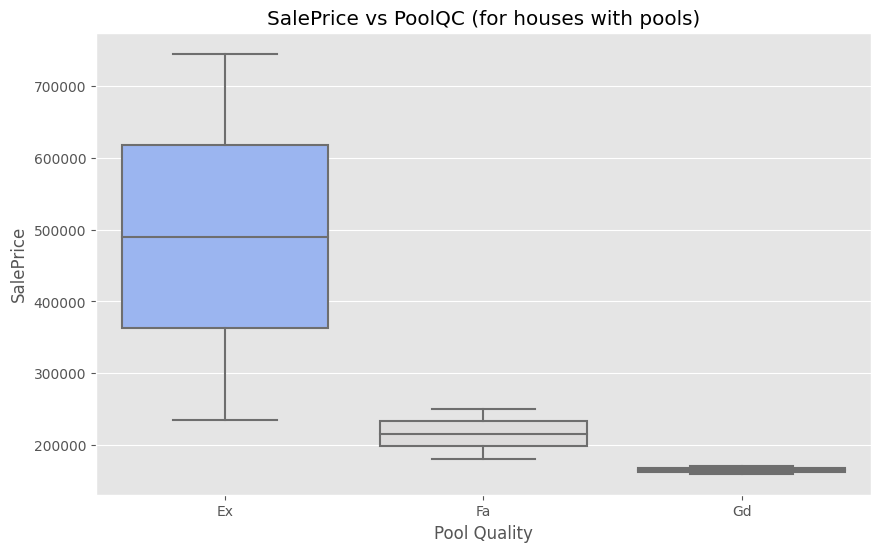

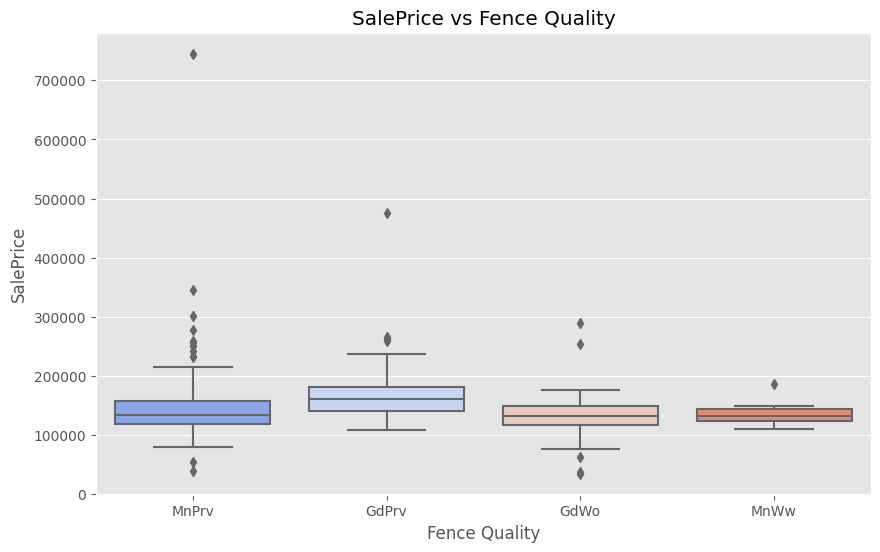

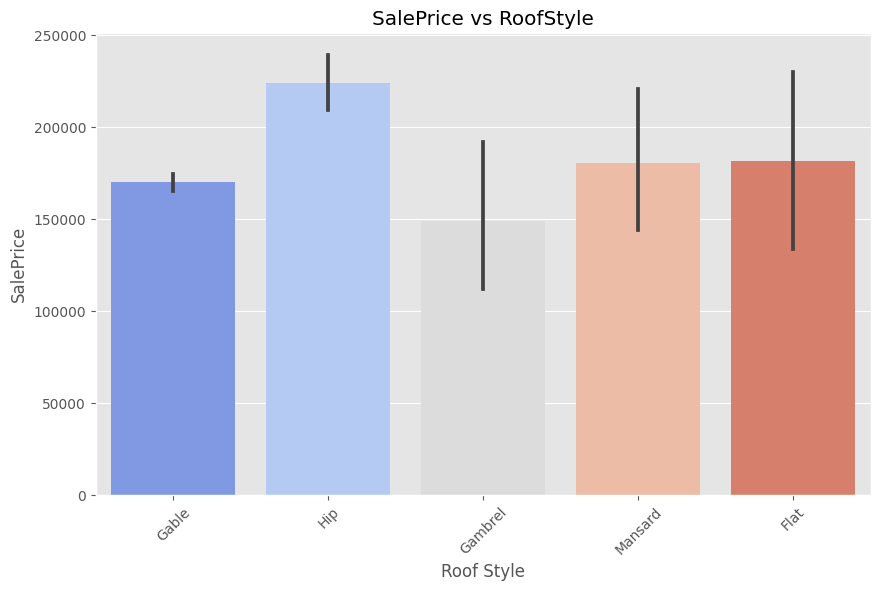

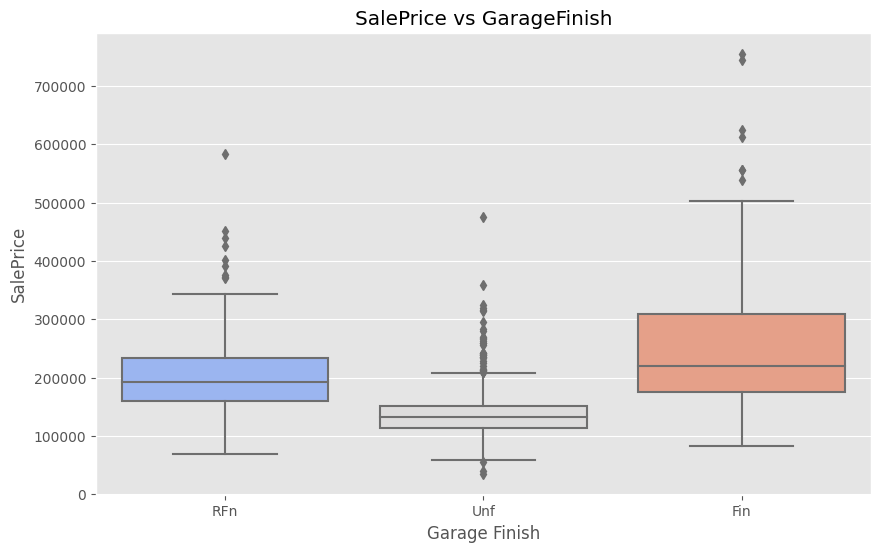

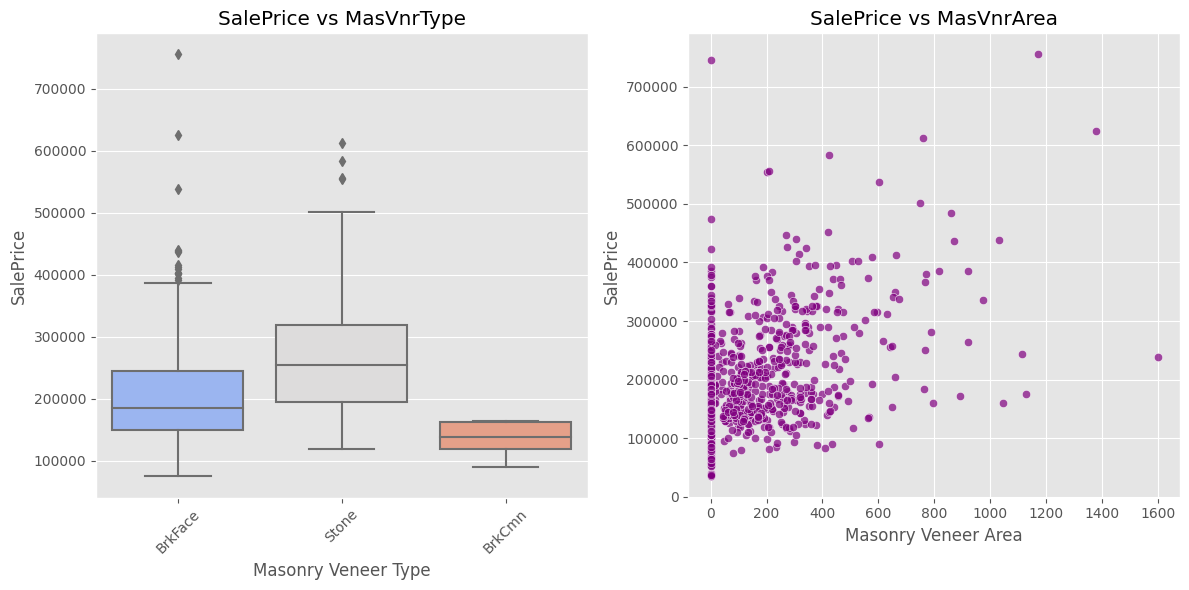

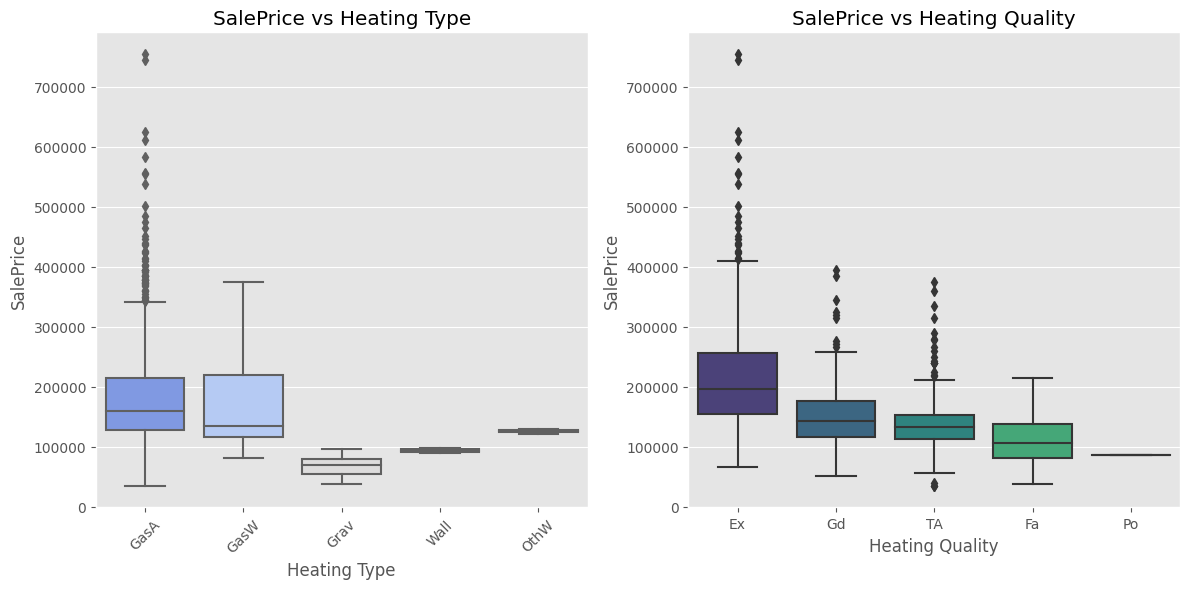

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='ExterQual', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs ExterQual')
plt.xlabel('ExterQual')
plt.ylabel('SalePrice')

plt.subplot(1, 2, 2)
sns.boxplot(x='ExterCond', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs ExterCond')
plt.xlabel('ExterCond')
plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Functional', y='SalePrice', data=train_df, palette='viridis')
plt.title('SalePrice vs Functional')
plt.xlabel('Functional Rating')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='FireplaceQu', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs FireplaceQu')
plt.xlabel('Fireplace Quality')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=train_df['WoodDeckSF'], y=train_df['SalePrice'], alpha=0.7, color='blue')
plt.title('SalePrice vs WoodDeckSF')
plt.xlabel('WoodDeckSF')
plt.ylabel('SalePrice')

plt.subplot(1, 2, 2)
sns.scatterplot(x=train_df['OpenPorchSF'], y=train_df['SalePrice'], alpha=0.7, color='green')
plt.title('SalePrice vs OpenPorchSF')
plt.xlabel('OpenPorchSF')
plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='PoolQC', y='SalePrice', data=train_df[train_df['PoolArea'] > 0], palette='coolwarm')
plt.title('SalePrice vs PoolQC (for houses with pools)')
plt.xlabel('Pool Quality')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Fence', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs Fence Quality')
plt.xlabel('Fence Quality')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='RoofStyle', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs RoofStyle')
plt.xlabel('Roof Style')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageFinish', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs GarageFinish')
plt.xlabel('Garage Finish')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='MasVnrType', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs MasVnrType')
plt.xlabel('Masonry Veneer Type')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.scatterplot(x=train_df['MasVnrArea'], y=train_df['SalePrice'], alpha=0.7, color='purple')
plt.title('SalePrice vs MasVnrArea')
plt.xlabel('Masonry Veneer Area')
plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Heating', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs Heating Type')
plt.xlabel('Heating Type')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='HeatingQC', y='SalePrice', data=train_df, palette='viridis')
plt.title('SalePrice vs Heating Quality')
plt.xlabel('Heating Quality')
plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

Analysis 31-40

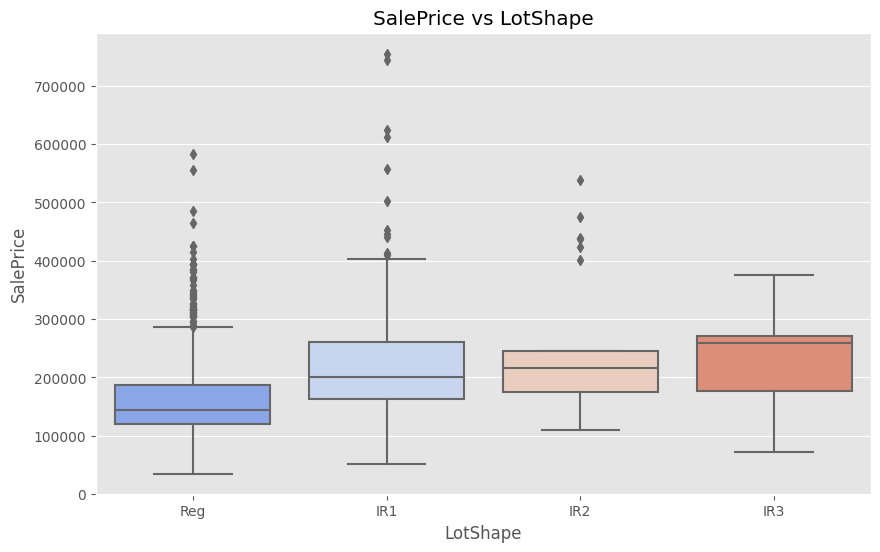

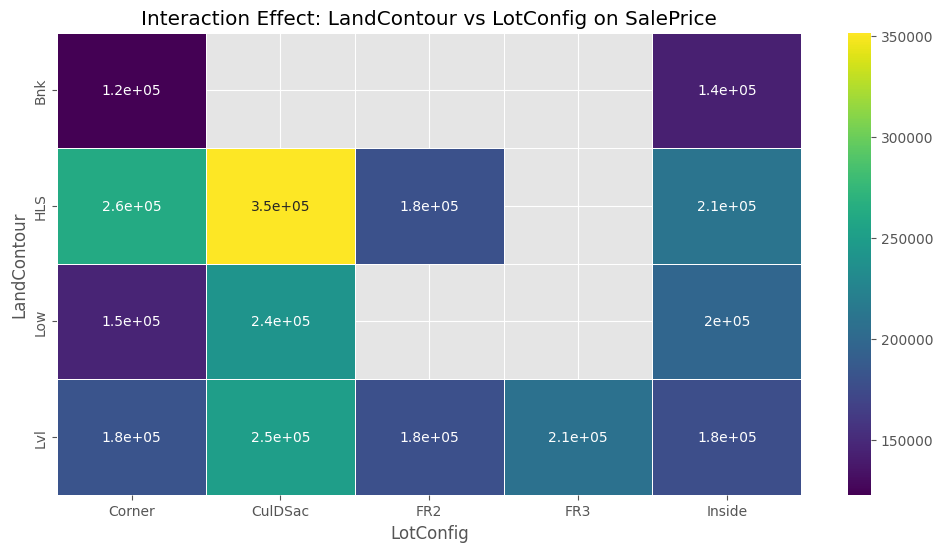

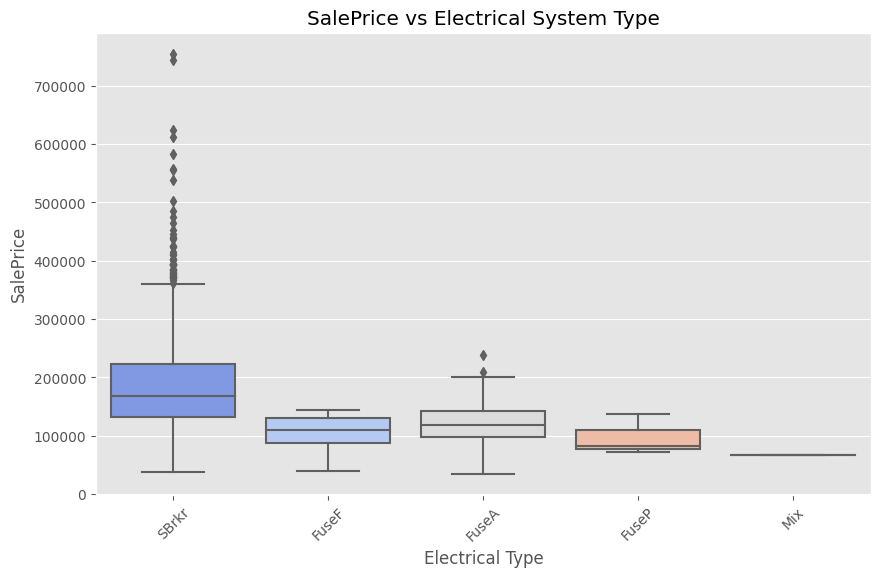

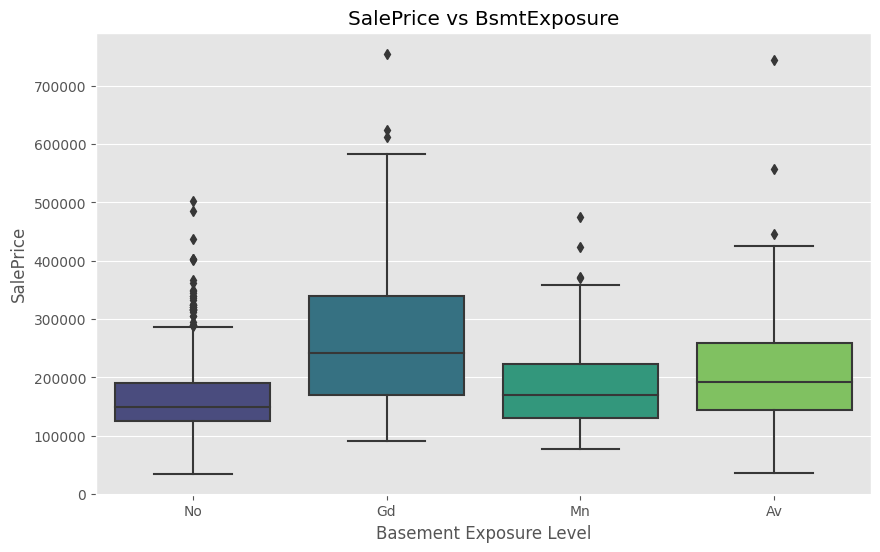

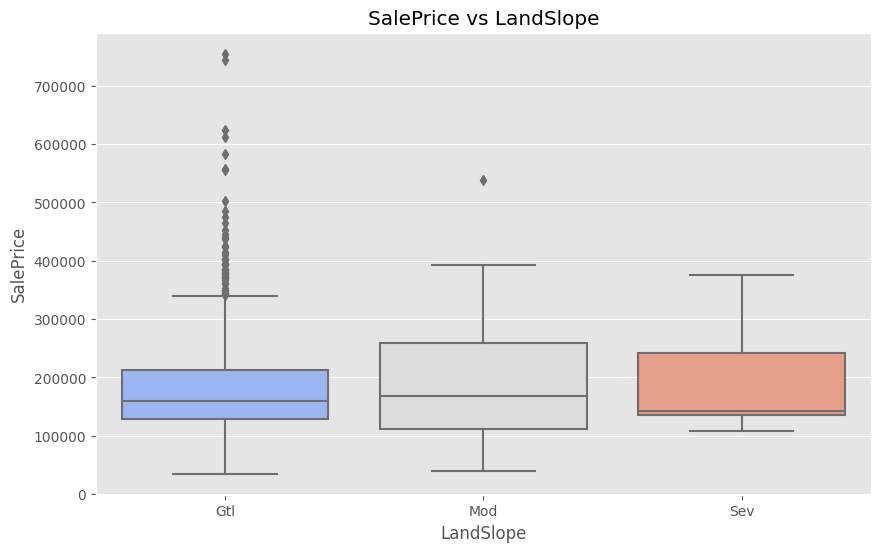

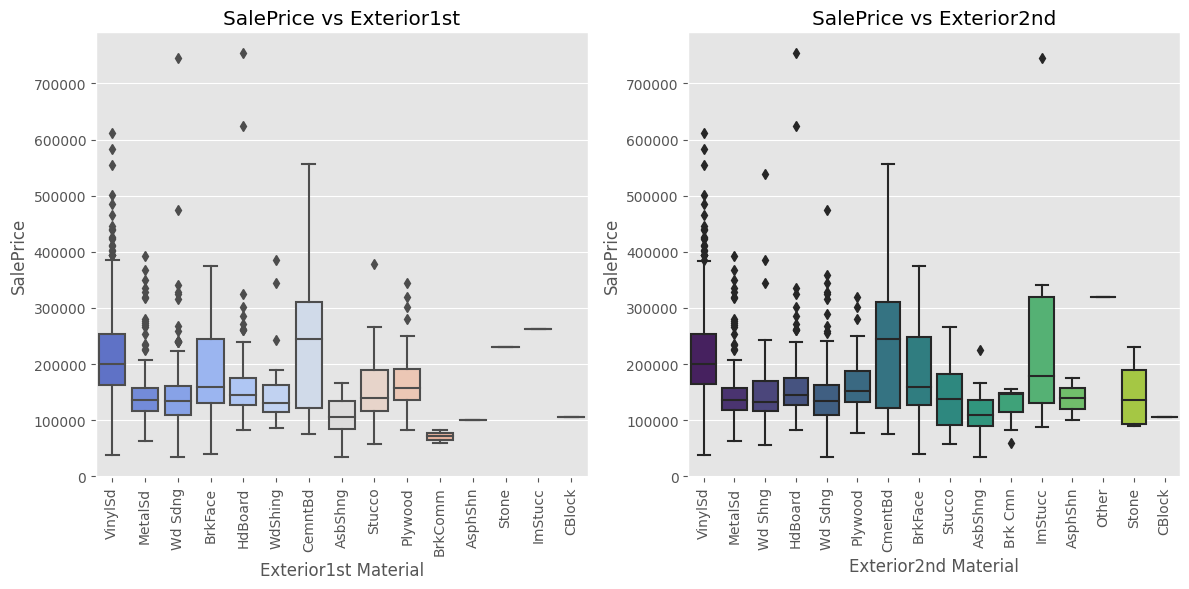

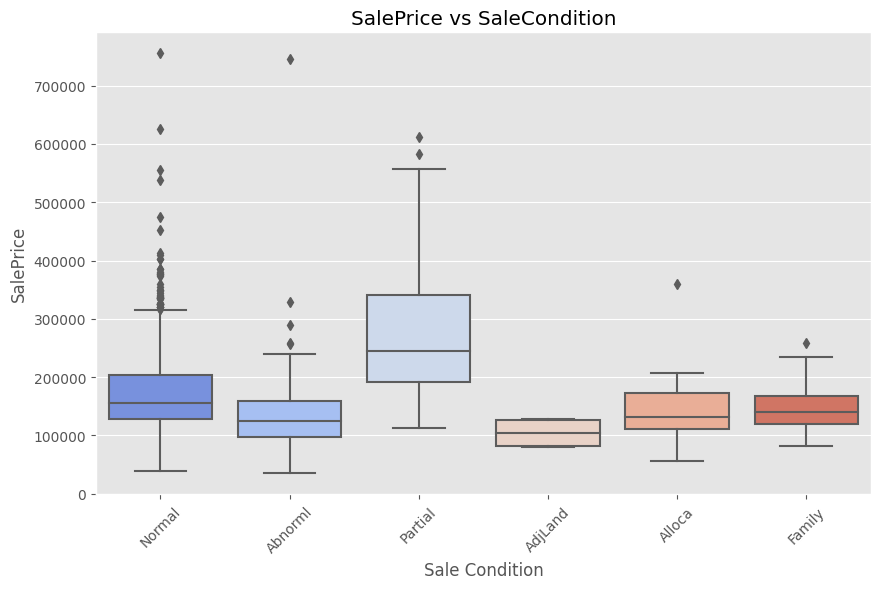

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


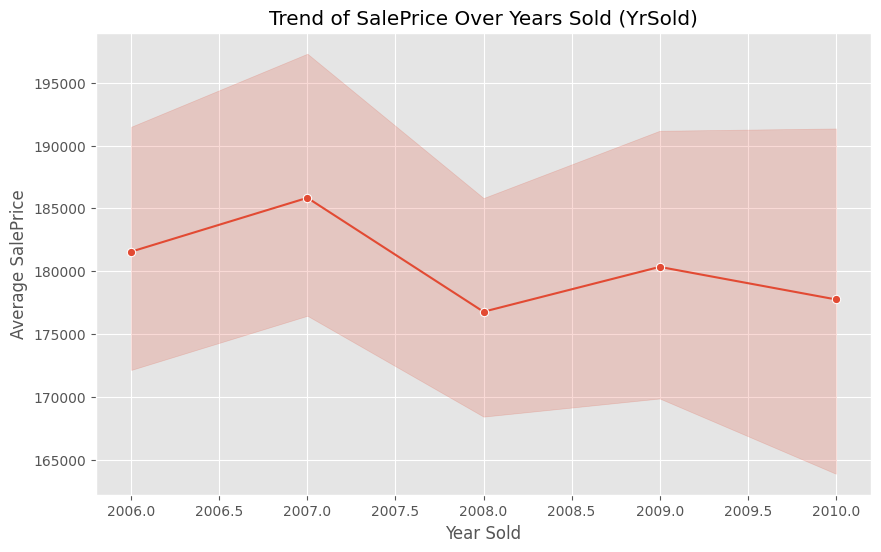

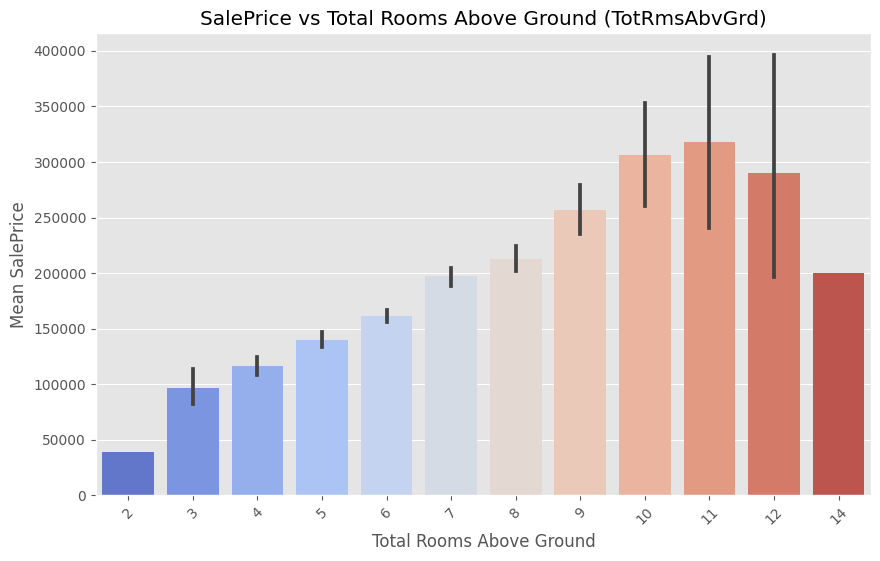

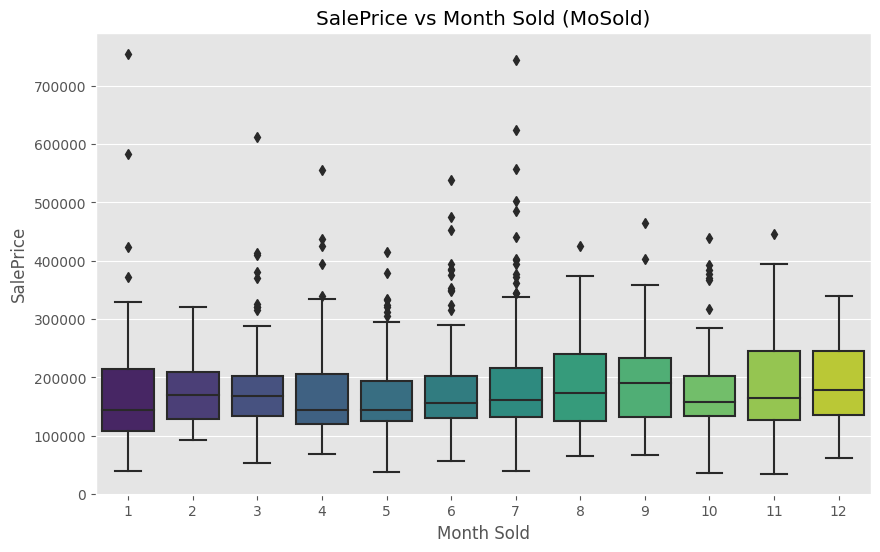

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='LotShape', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs LotShape')
plt.xlabel('LotShape')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(12, 6))
interaction_plot = train_df.pivot_table(values='SalePrice', index='LandContour', columns='LotConfig', aggfunc='mean')
sns.heatmap(interaction_plot, cmap='viridis', annot=True, linewidths=0.5)
plt.title('Interaction Effect: LandContour vs LotConfig on SalePrice')
plt.xlabel('LotConfig')
plt.ylabel('LandContour')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Electrical', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs Electrical System Type')
plt.xlabel('Electrical Type')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='BsmtExposure', y='SalePrice', data=train_df, palette='viridis')
plt.title('SalePrice vs BsmtExposure')
plt.xlabel('Basement Exposure Level')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='LandSlope', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs LandSlope')
plt.xlabel('LandSlope')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Exterior1st', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs Exterior1st')
plt.xlabel('Exterior1st Material')
plt.ylabel('SalePrice')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(x='Exterior2nd', y='SalePrice', data=train_df, palette='viridis')
plt.title('SalePrice vs Exterior2nd')
plt.xlabel('Exterior2nd Material')
plt.ylabel('SalePrice')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='SaleCondition', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs SaleCondition')
plt.xlabel('Sale Condition')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='YrSold', y='SalePrice', data=train_df, marker='o', linestyle='-')
plt.title('Trend of SalePrice Over Years Sold (YrSold)')
plt.xlabel('Year Sold')
plt.ylabel('Average SalePrice')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='TotRmsAbvGrd', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs Total Rooms Above Ground (TotRmsAbvGrd)')
plt.xlabel('Total Rooms Above Ground')
plt.ylabel('Mean SalePrice')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='MoSold', y='SalePrice', data=train_df, palette='viridis')
plt.title('SalePrice vs Month Sold (MoSold)')
plt.xlabel('Month Sold')
plt.ylabel('SalePrice')
plt.show()

Analysis 41-50

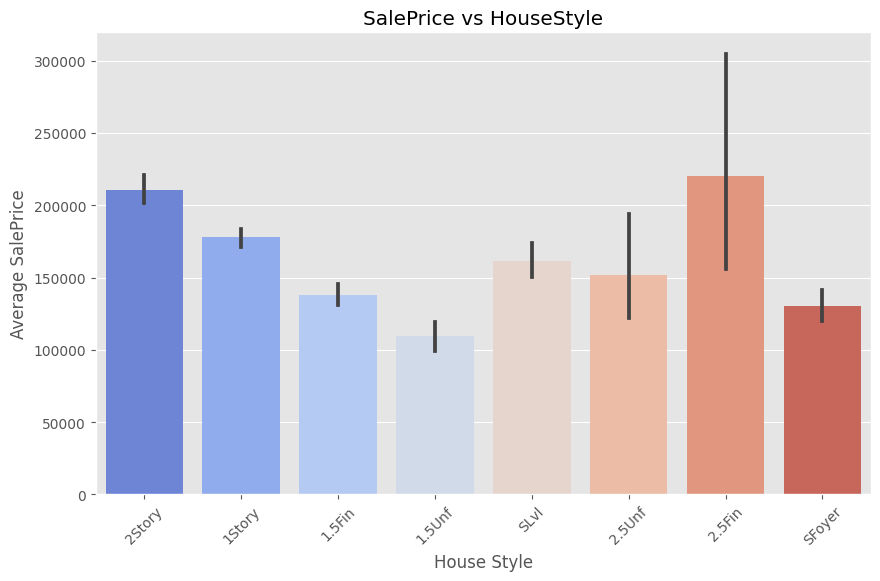

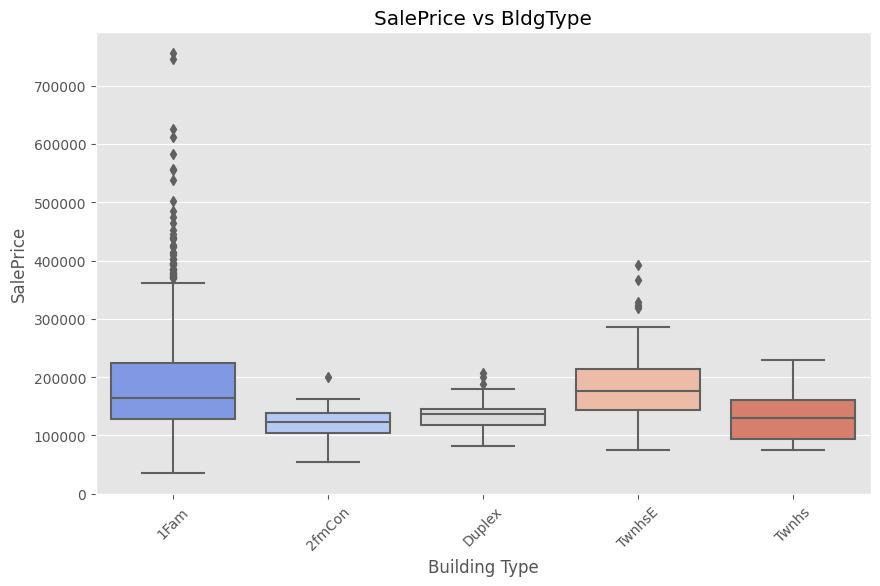

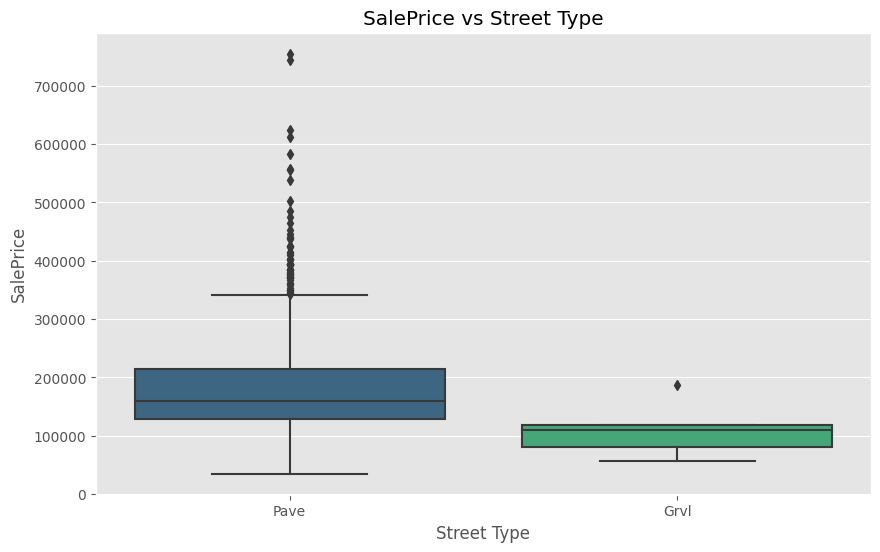

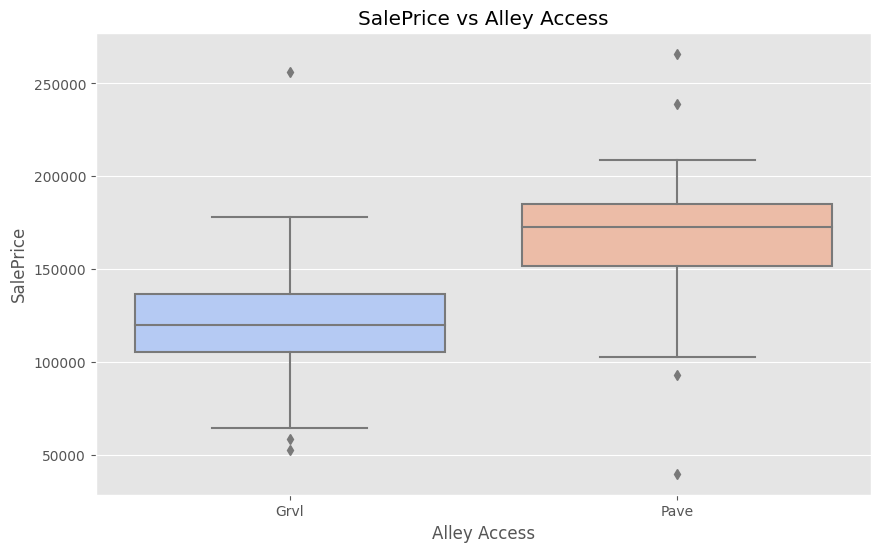

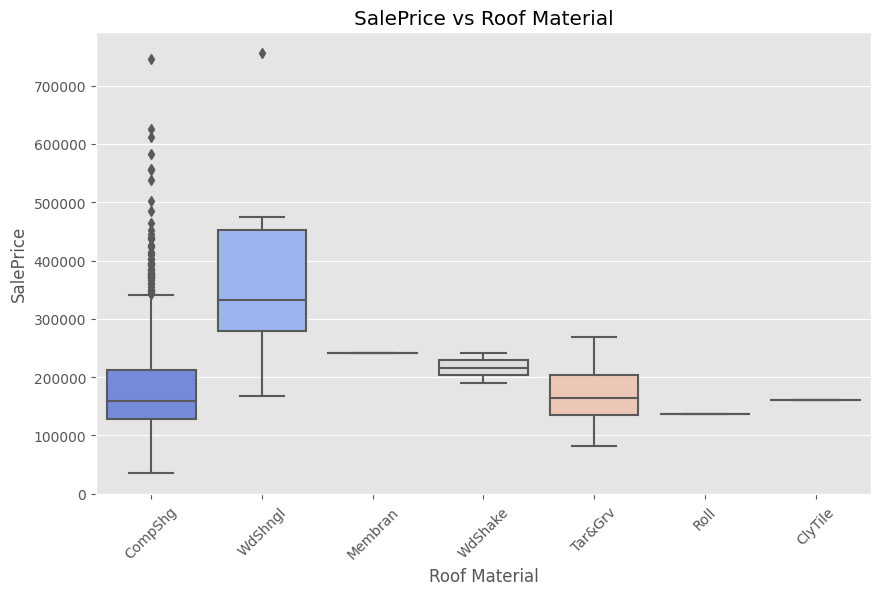

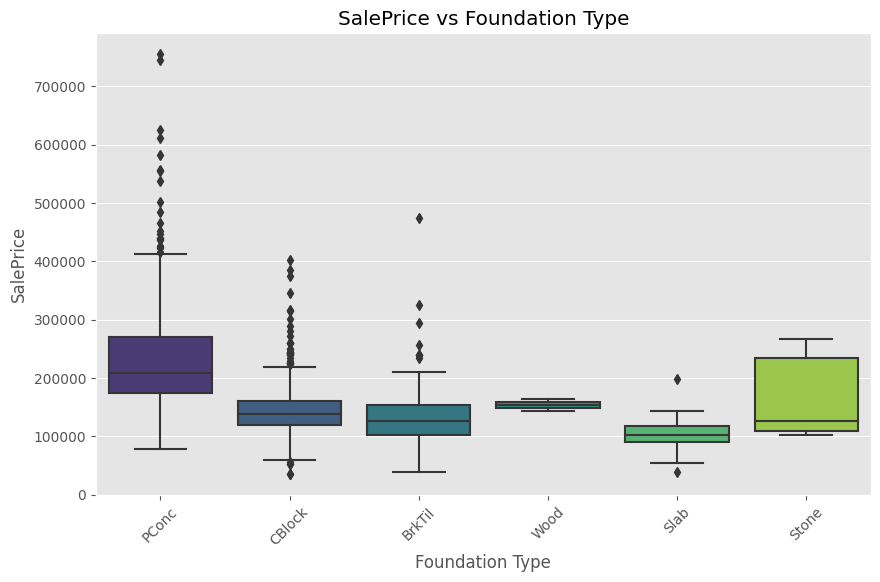

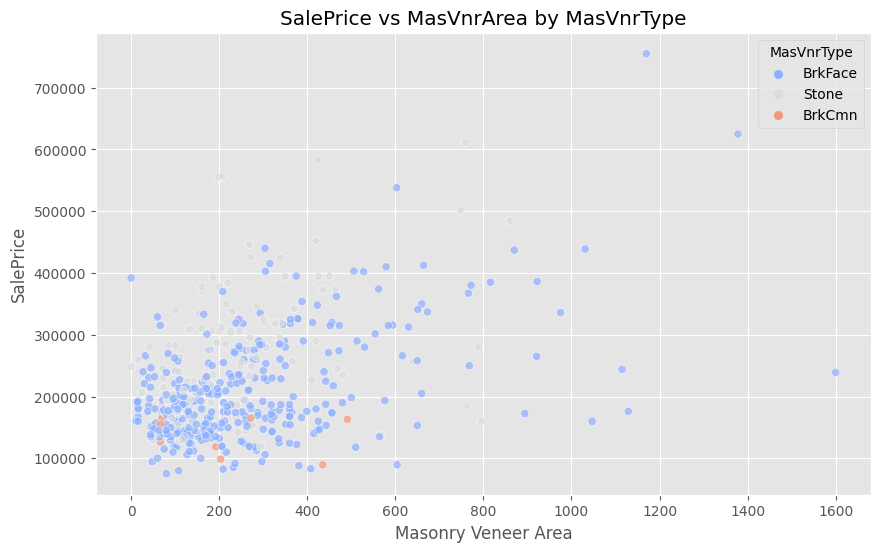

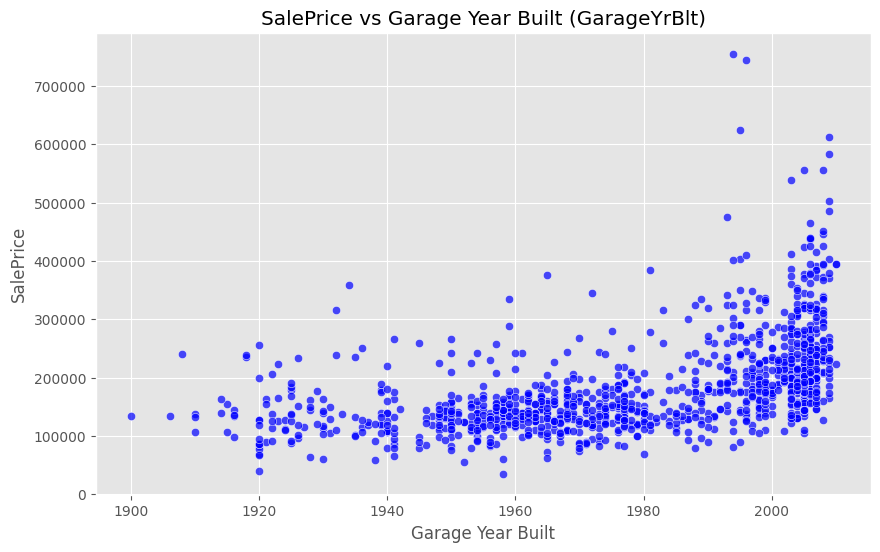

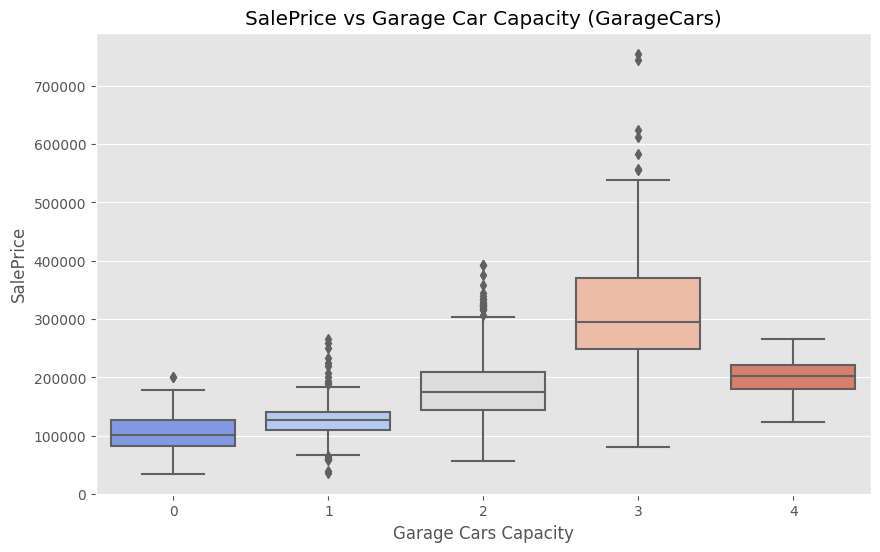

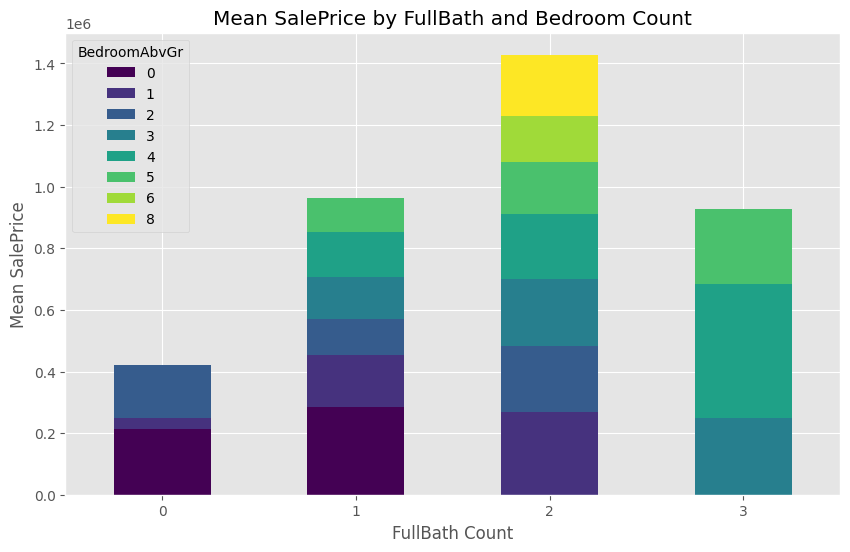

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='HouseStyle', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs HouseStyle')
plt.xlabel('House Style')
plt.ylabel('Average SalePrice')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='BldgType', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs BldgType')
plt.xlabel('Building Type')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Street', y='SalePrice', data=train_df, palette='viridis')
plt.title('SalePrice vs Street Type')
plt.xlabel('Street Type')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Alley', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs Alley Access')
plt.xlabel('Alley Access')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='RoofMatl', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs Roof Material')
plt.xlabel('Roof Material')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Foundation', y='SalePrice', data=train_df, palette='viridis')
plt.title('SalePrice vs Foundation Type')
plt.xlabel('Foundation Type')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='MasVnrArea', y='SalePrice', hue='MasVnrType', data=train_df, palette='coolwarm', alpha=0.7)
plt.title('SalePrice vs MasVnrArea by MasVnrType')
plt.xlabel('Masonry Veneer Area')
plt.ylabel('SalePrice')
plt.legend(title='MasVnrType')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GarageYrBlt', y='SalePrice', data=train_df, alpha=0.7, color='blue')
plt.title('SalePrice vs Garage Year Built (GarageYrBlt)')
plt.xlabel('Garage Year Built')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs Garage Car Capacity (GarageCars)')
plt.xlabel('Garage Cars Capacity')
plt.ylabel('SalePrice')
plt.show()

bath_bed_comb = train_df.groupby(['FullBath', 'BedroomAbvGr'])['SalePrice'].mean().unstack()

bath_bed_comb.plot(kind='bar', stacked=True, cmap='viridis', figsize=(10, 6))
plt.title('Mean SalePrice by FullBath and Bedroom Count')
plt.xlabel('FullBath Count')
plt.ylabel('Mean SalePrice')
plt.xticks(rotation=0)
plt.show()

Analysis 51-60

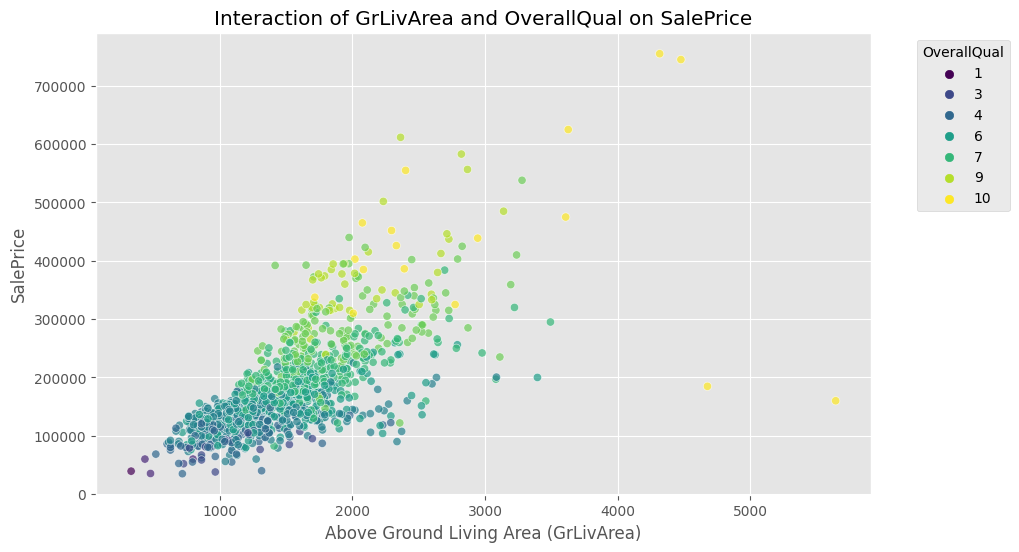

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


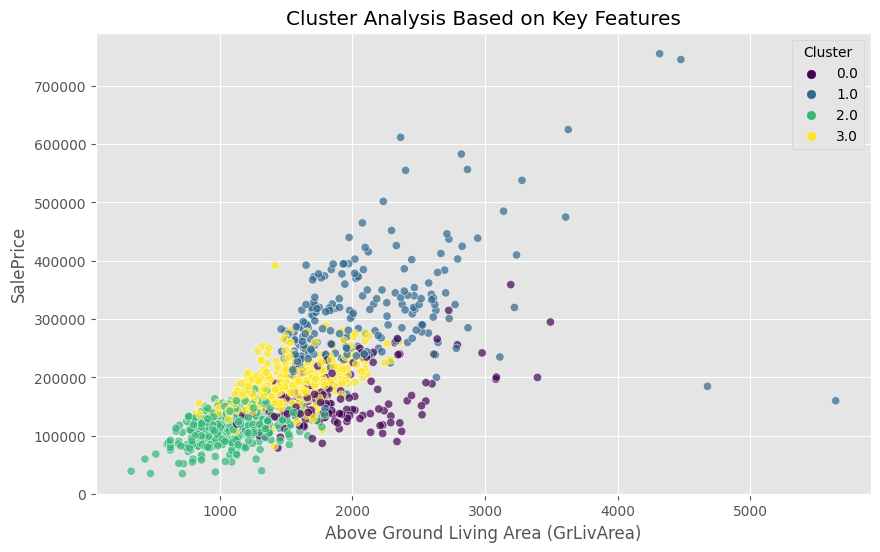

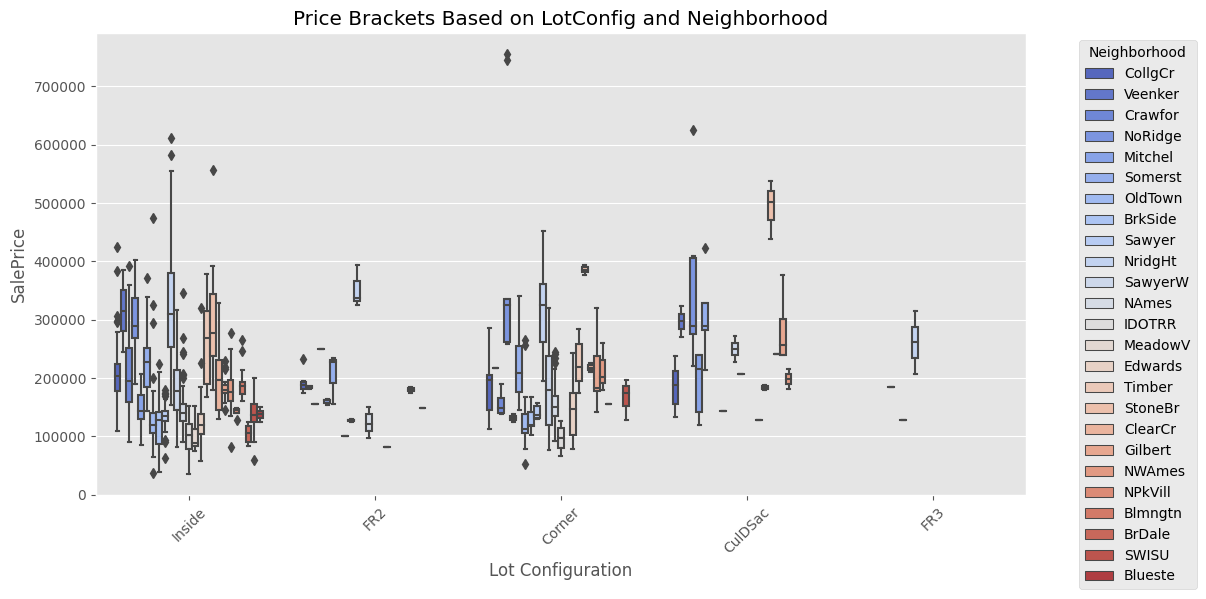

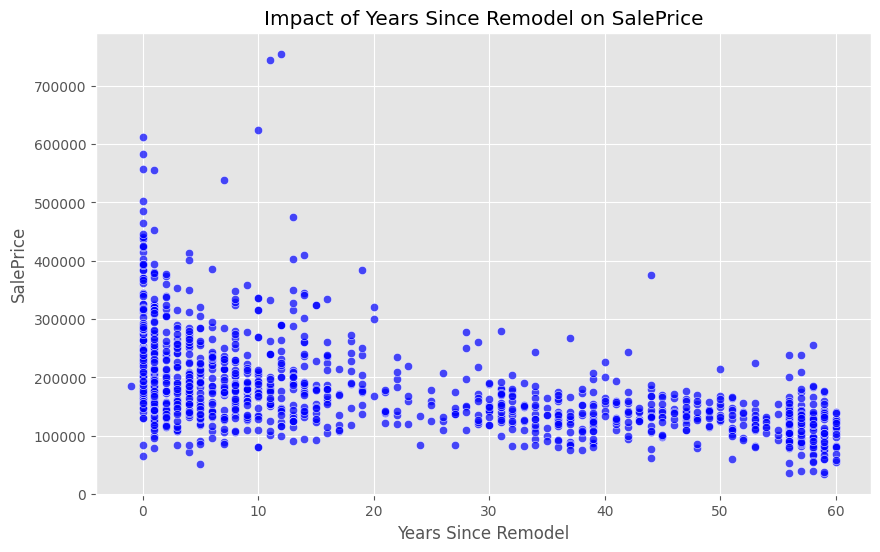

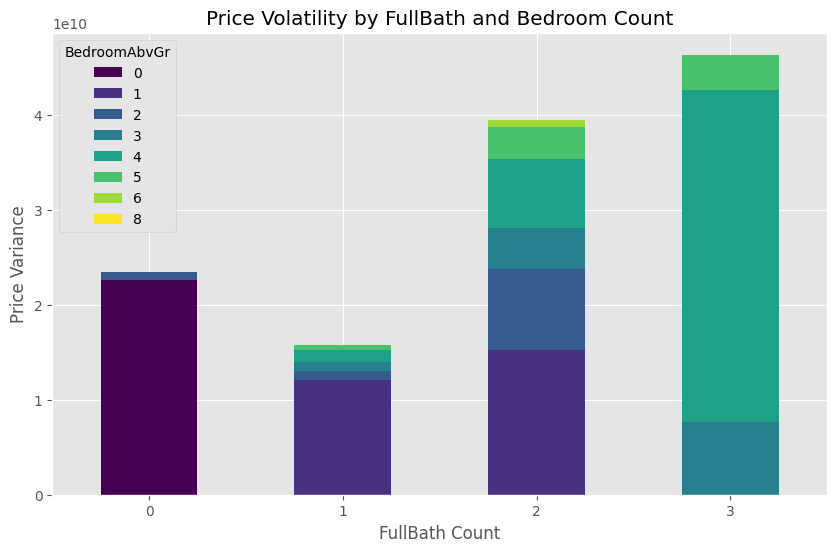

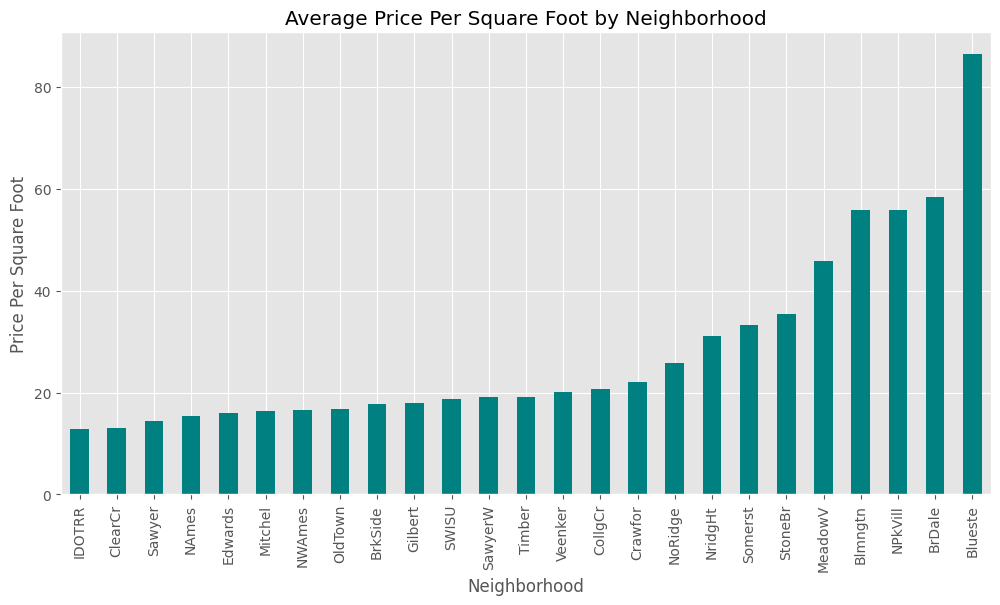

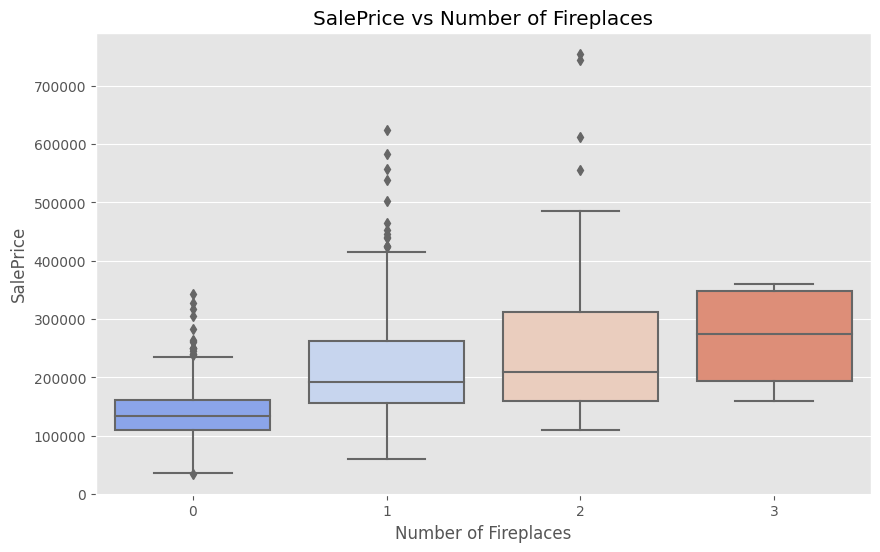

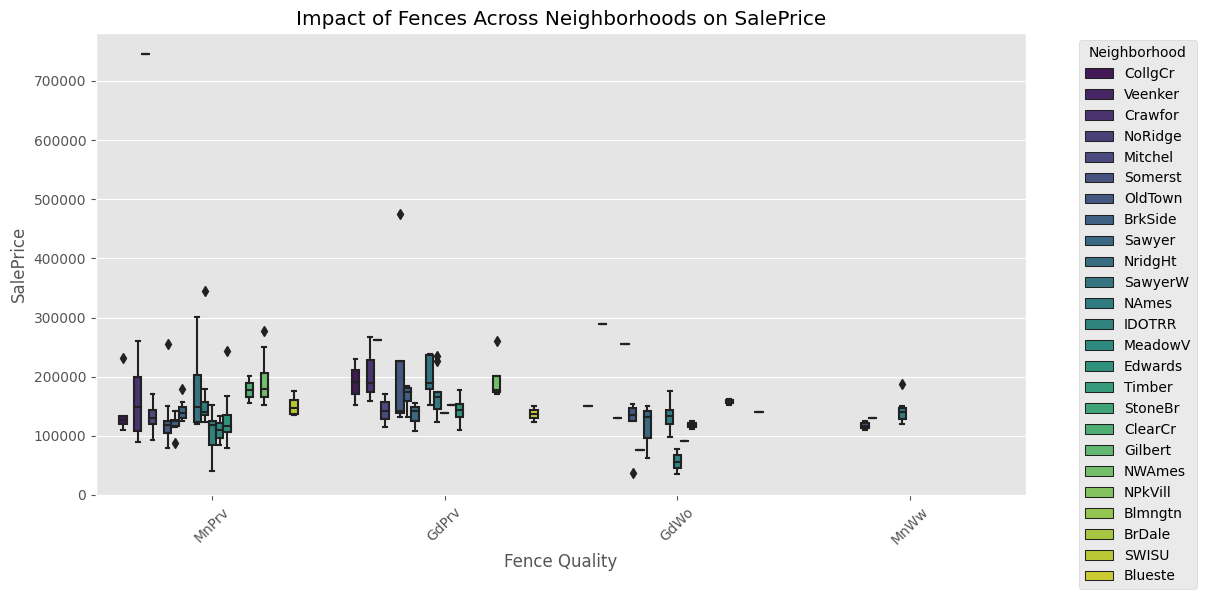

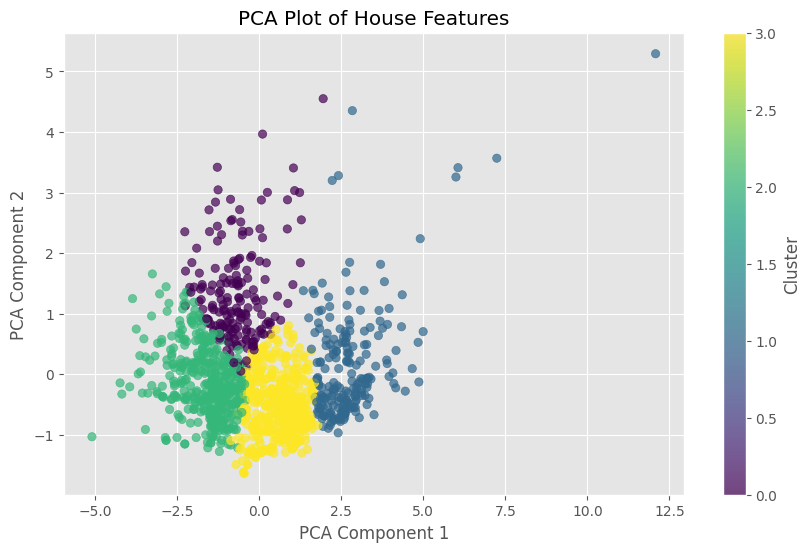

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


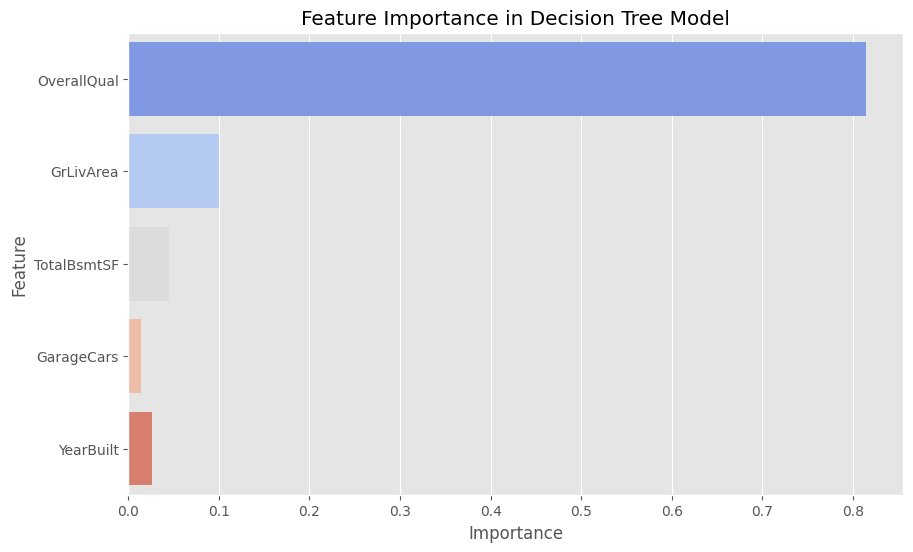

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='OverallQual', data=train_df, palette='viridis', alpha=0.7)
plt.title('Interaction of GrLivArea and OverallQual on SalePrice')
plt.xlabel('Above Ground Living Area (GrLivArea)')
plt.ylabel('SalePrice')
plt.legend(title='OverallQual', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

features_for_clustering = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt', 'OverallQual']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_df[features_for_clustering].dropna())

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

train_df['Cluster'] = np.nan
train_df.loc[train_df[features_for_clustering].notna().all(axis=1), 'Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='Cluster', data=train_df, palette='viridis', alpha=0.7)
plt.title('Cluster Analysis Based on Key Features')
plt.xlabel('Above Ground Living Area (GrLivArea)')
plt.ylabel('SalePrice')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='LotConfig', y='SalePrice', hue='Neighborhood', data=train_df, palette='coolwarm')
plt.title('Price Brackets Based on LotConfig and Neighborhood')
plt.xlabel('Lot Configuration')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

train_df['Years_Since_Remodel'] = train_df['YrSold'] - train_df['YearRemodAdd']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years_Since_Remodel', y='SalePrice', data=train_df, alpha=0.7, color='blue')
plt.title('Impact of Years Since Remodel on SalePrice')
plt.xlabel('Years Since Remodel')
plt.ylabel('SalePrice')
plt.show()

bath_bed_volatility = train_df.groupby(['FullBath', 'BedroomAbvGr'])['SalePrice'].var().unstack()
bath_bed_volatility.plot(kind='bar', stacked=True, cmap='viridis', figsize=(10, 6))
plt.title('Price Volatility by FullBath and Bedroom Count')
plt.xlabel('FullBath Count')
plt.ylabel('Price Variance')
plt.xticks(rotation=0)
plt.show()

train_df['Price_Per_SqFt'] = train_df['SalePrice'] / train_df['LotArea']
neighborhood_price_per_sqft = train_df.groupby('Neighborhood')['Price_Per_SqFt'].mean().sort_values()
plt.figure(figsize=(12, 6))
neighborhood_price_per_sqft.plot(kind='bar', color='teal')
plt.title('Average Price Per Square Foot by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price Per Square Foot')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Fireplaces', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('SalePrice vs Number of Fireplaces')
plt.xlabel('Number of Fireplaces')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Fence', y='SalePrice', hue='Neighborhood', data=train_df, palette='viridis')
plt.title('Impact of Fences Across Neighborhoods on SalePrice')
plt.xlabel('Fence Quality')
plt.ylabel('SalePrice')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('PCA Plot of House Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

features_for_tree = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'YearBuilt']
X = train_df[features_for_tree].dropna()
y = train_df['SalePrice'].loc[X.index]

tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X, y)
y_pred = tree_model.predict(X)
importance = tree_model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features_for_tree, palette='coolwarm')
plt.title('Feature Importance in Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Analysis 61-70

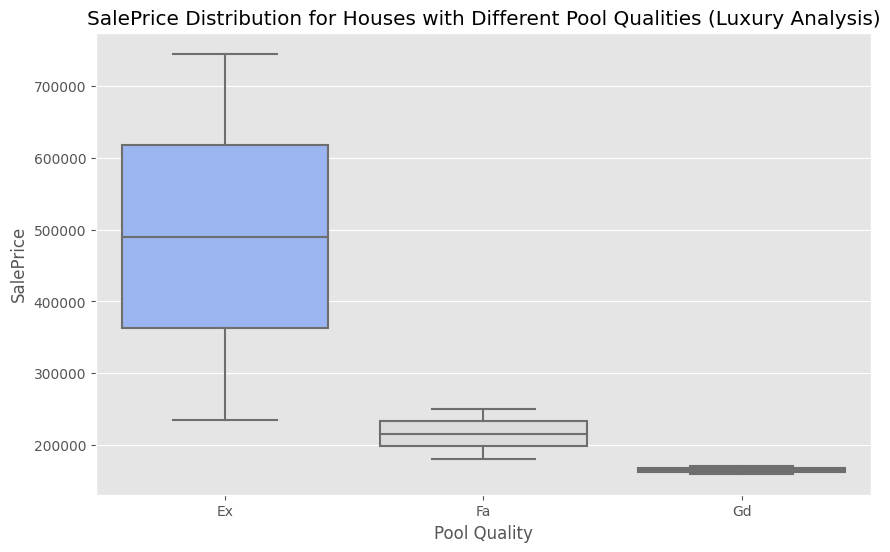

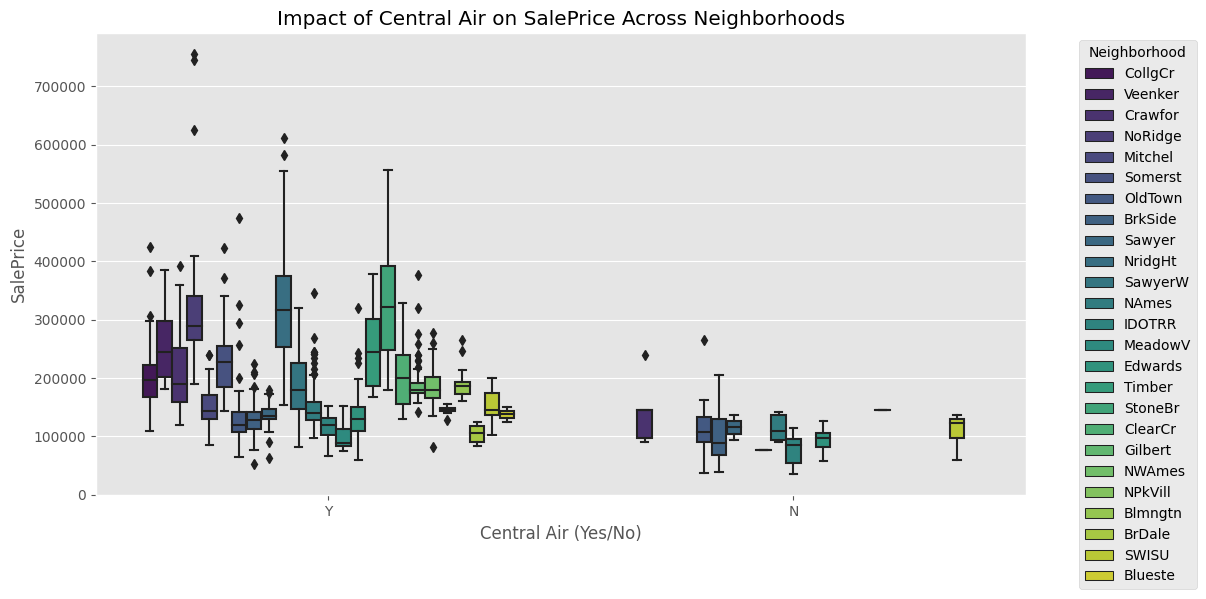

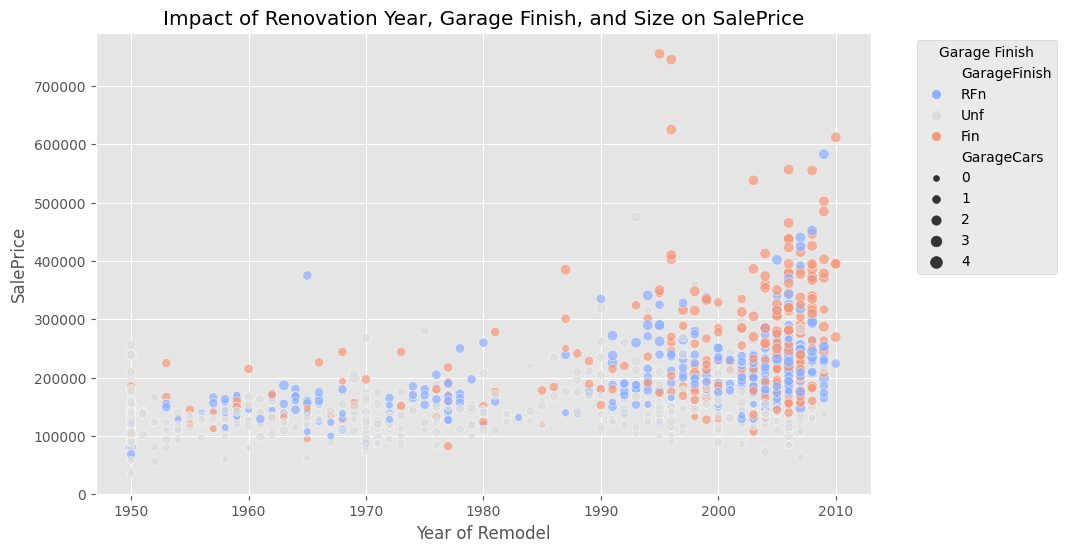

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


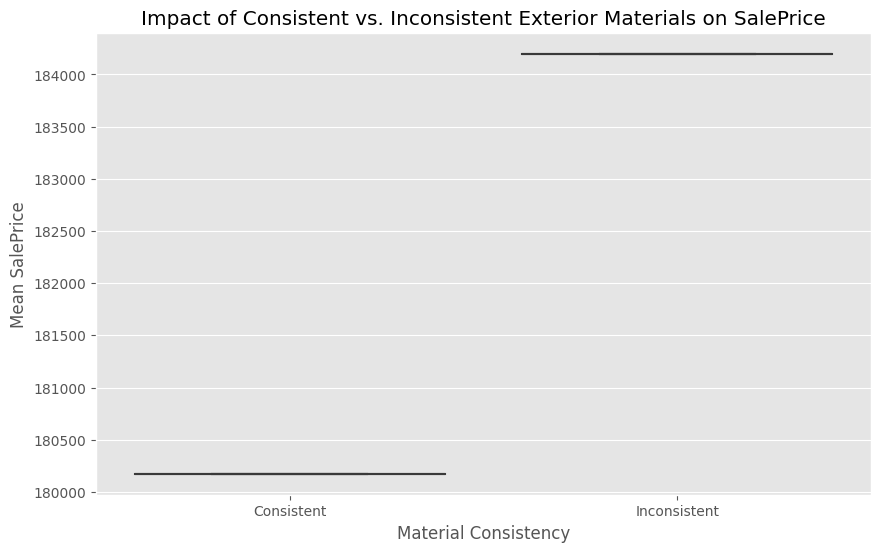

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


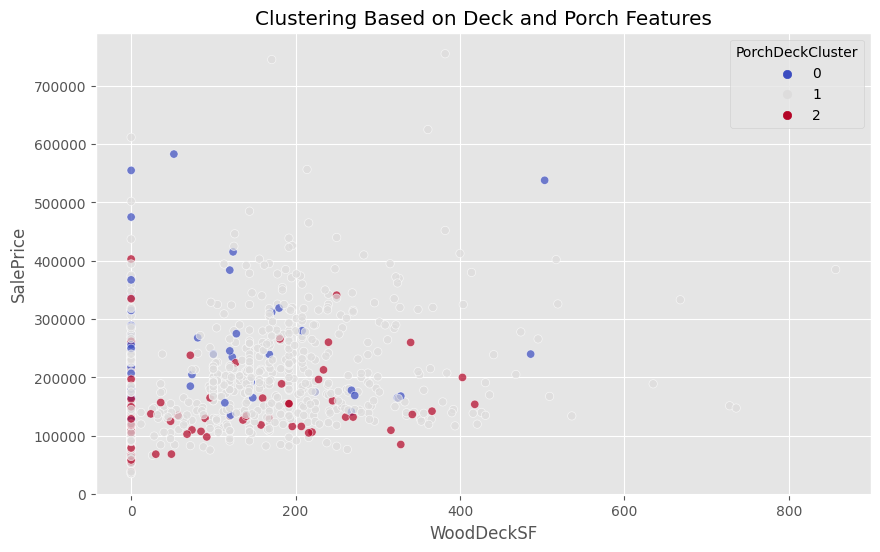

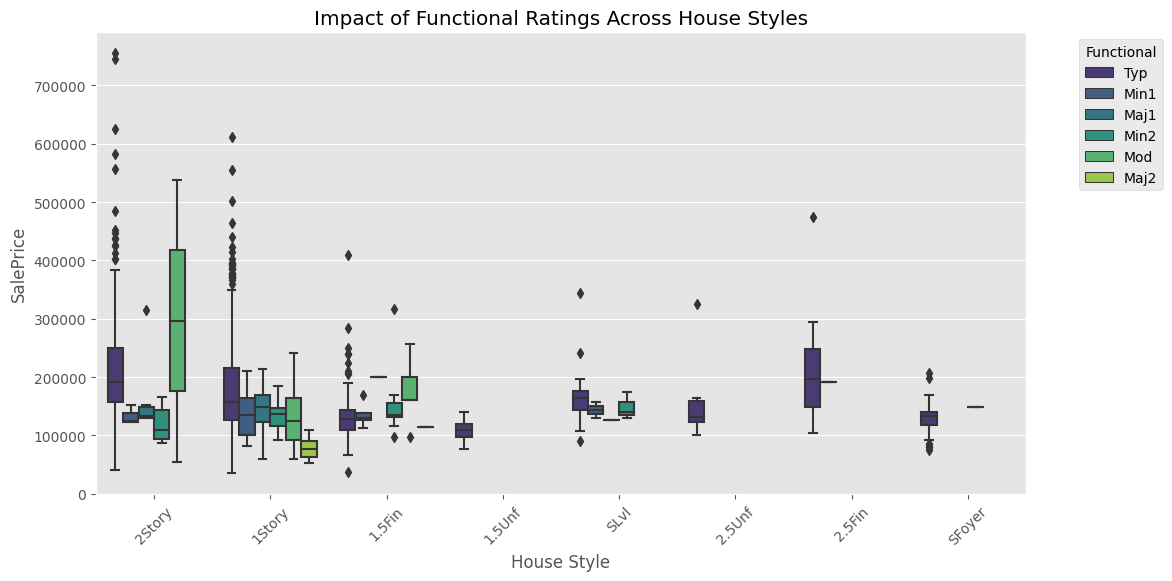

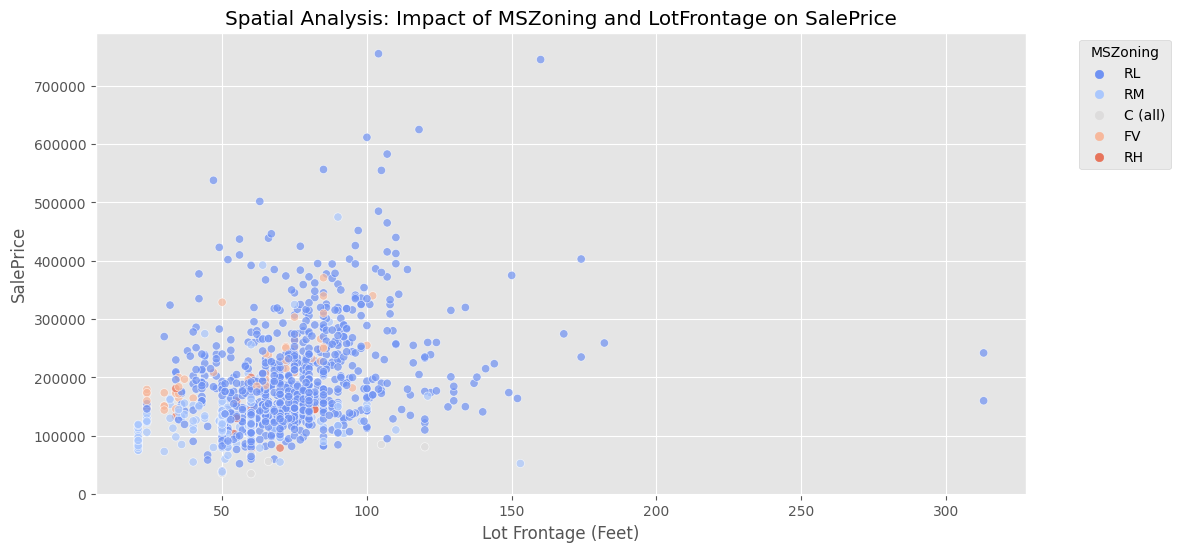

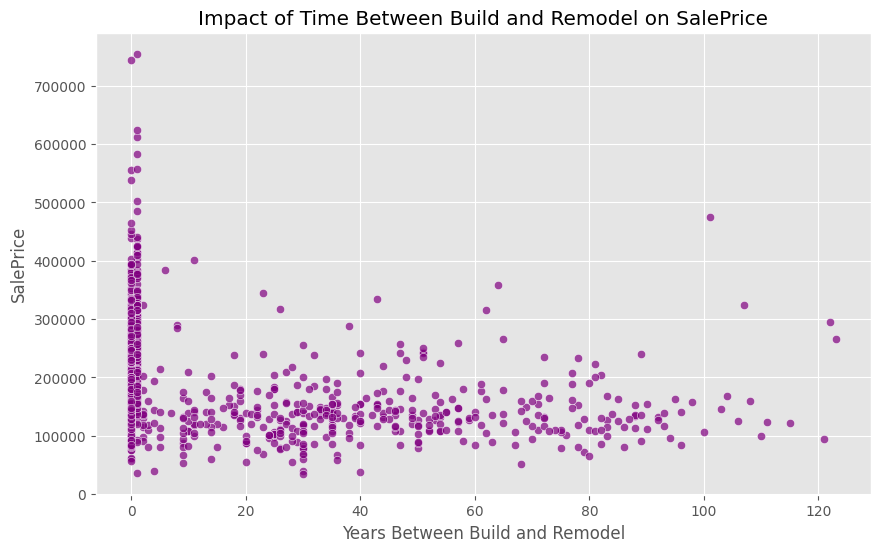

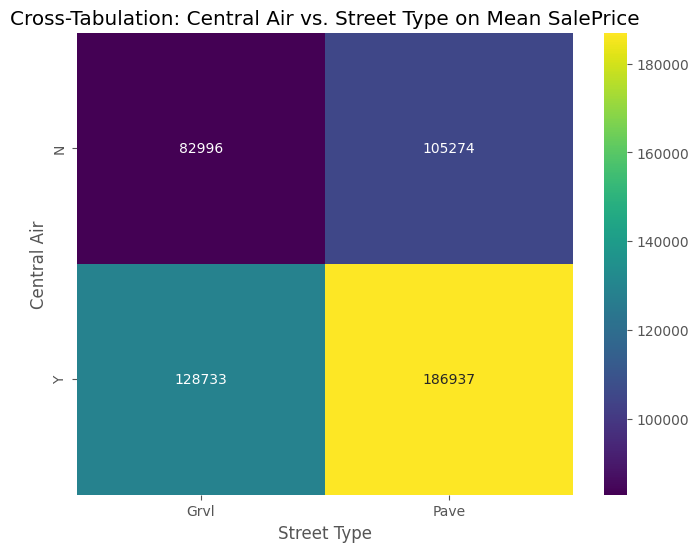

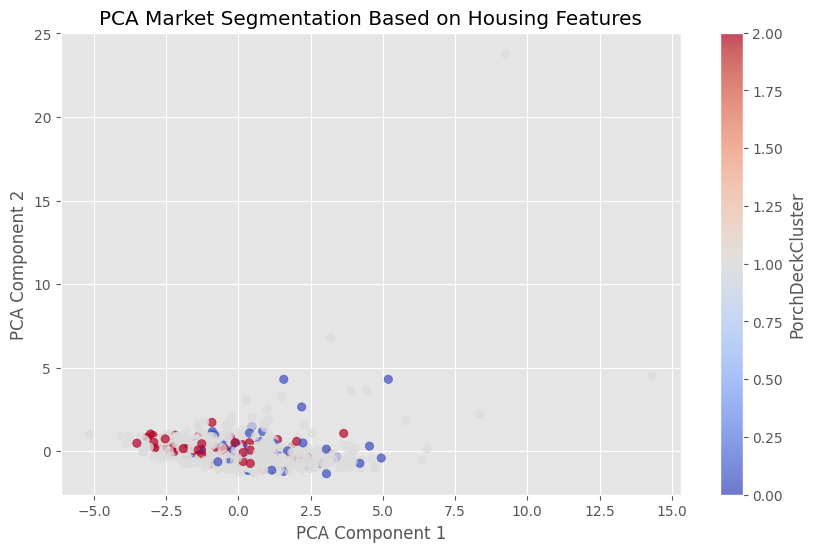

In [14]:
luxury_features = ['PoolQC', 'FireplaceQu', 'ExterQual']
luxury_houses = train_df.dropna(subset=luxury_features)
plt.figure(figsize=(10, 6))
sns.boxplot(x='PoolQC', y='SalePrice', data=luxury_houses, palette='coolwarm')
plt.title('SalePrice Distribution for Houses with Different Pool Qualities (Luxury Analysis)')
plt.xlabel('Pool Quality')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='CentralAir', y='SalePrice', hue='Neighborhood', data=train_df, palette='viridis')
plt.title('Impact of Central Air on SalePrice Across Neighborhoods')
plt.xlabel('Central Air (Yes/No)')
plt.ylabel('SalePrice')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearRemodAdd', y='SalePrice', hue='GarageFinish', size='GarageCars', data=train_df, palette='coolwarm', alpha=0.7)
plt.title('Impact of Renovation Year, Garage Finish, and Size on SalePrice')
plt.xlabel('Year of Remodel')
plt.ylabel('SalePrice')
plt.legend(title='Garage Finish', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

consistent_materials = train_df[train_df['Exterior1st'] == train_df['Exterior2nd']]
inconsistent_materials = train_df[train_df['Exterior1st'] != train_df['Exterior2nd']]

plt.figure(figsize=(10, 6))
sns.boxplot(x=['Consistent', 'Inconsistent'], y=[consistent_materials['SalePrice'].mean(), inconsistent_materials['SalePrice'].mean()], palette='viridis')
plt.title('Impact of Consistent vs. Inconsistent Exterior Materials on SalePrice')
plt.xlabel('Material Consistency')
plt.ylabel('Mean SalePrice')
plt.show()

porch_deck_features = ['WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'EnclosedPorch']
scaled_porch_deck_features = scaler.fit_transform(train_df[porch_deck_features])
kmeans_porch_deck = KMeans(n_clusters=3, random_state=42)
porch_clusters = kmeans_porch_deck.fit_predict(scaled_porch_deck_features)

train_df['PorchDeckCluster'] = porch_clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='WoodDeckSF', y='SalePrice', hue='PorchDeckCluster', data=train_df, palette='coolwarm', alpha=0.7)
plt.title('Clustering Based on Deck and Porch Features')
plt.xlabel('WoodDeckSF')
plt.ylabel('SalePrice')
plt.legend(title='PorchDeckCluster')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='HouseStyle', y='SalePrice', hue='Functional', data=train_df, palette='viridis')
plt.title('Impact of Functional Ratings Across House Styles')
plt.xlabel('House Style')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.legend(title='Functional', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='LotFrontage', y='SalePrice', hue='MSZoning', data=train_df, palette='coolwarm', alpha=0.7)
plt.title('Spatial Analysis: Impact of MSZoning and LotFrontage on SalePrice')
plt.xlabel('Lot Frontage (Feet)')
plt.ylabel('SalePrice')
plt.legend(title='MSZoning', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

train_df['Years_Between_Build_Remodel'] = train_df['YearRemodAdd'] - train_df['YearBuilt']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years_Between_Build_Remodel', y='SalePrice', data=train_df, alpha=0.7, color='purple')
plt.title('Impact of Time Between Build and Remodel on SalePrice')
plt.xlabel('Years Between Build and Remodel')
plt.ylabel('SalePrice')
plt.show()

cross_tab_result = pd.crosstab(train_df['CentralAir'], train_df['Street'], values=train_df['SalePrice'], aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab_result, annot=True, cmap='viridis', fmt='.0f')
plt.title('Cross-Tabulation: Central Air vs. Street Type on Mean SalePrice')
plt.xlabel('Street Type')
plt.ylabel('Central Air')
plt.show()

pca_features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'LotArea', 'OverallQual']
scaled_pca_features = scaler.fit_transform(train_df[pca_features].dropna())
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_pca_features)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=porch_clusters, cmap='coolwarm', alpha=0.7)
plt.title('PCA Market Segmentation Based on Housing Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='PorchDeckCluster')
plt.show()

# **Time Series Analysis**

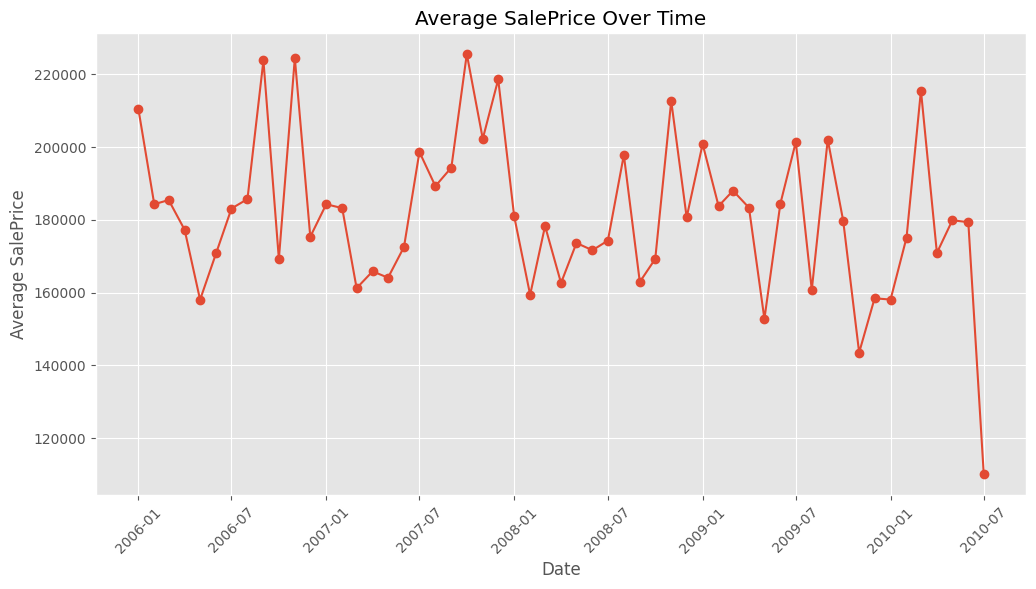

In [15]:
train_df['SaleDate'] = pd.to_datetime(train_df['YrSold'].astype(str) + '-' + train_df['MoSold'].astype(str) + '-01')

monthly_sales = train_df.groupby('SaleDate')['SalePrice'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title("Average SalePrice Over Time")
plt.xlabel("Date")
plt.ylabel("Average SalePrice")
plt.xticks(rotation=45)
plt.show()

In [16]:
from scipy import stats

high_corr_features = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF"]
outliers = (train_df[high_corr_features].apply(lambda x: abs(stats.zscore(x)) > 3).any(axis=1))
cleaned_train_df = train_df[~outliers]

cleaned_train_df.shape, train_df.shape 

((1173, 87), (1201, 87))

<Figure size 1200x1000 with 0 Axes>

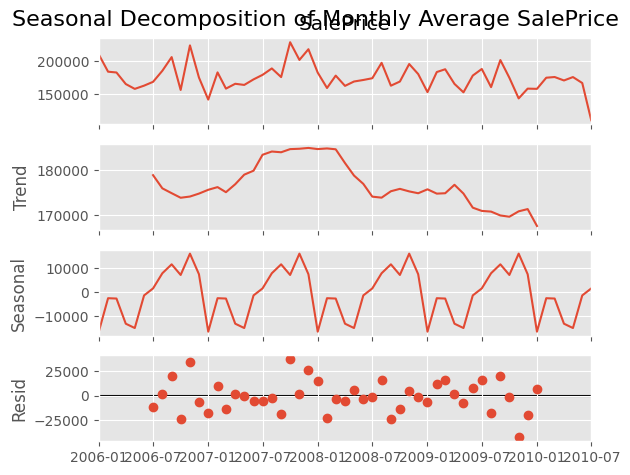

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
monthly_sales_cleaned = cleaned_train_df.groupby('SaleDate')['SalePrice'].mean()

decomposition = seasonal_decompose(monthly_sales_cleaned, model='additive', period=12)

plt.figure(figsize=(12, 10))
decomposition.plot()
plt.suptitle("Seasonal Decomposition of Monthly Average SalePrice", fontsize=16)
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


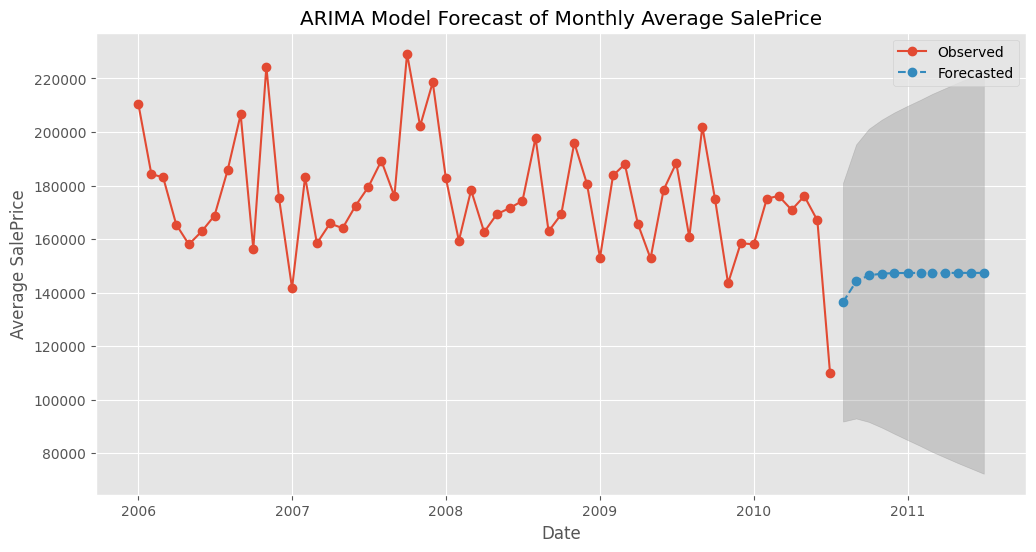

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

arima_model = ARIMA(monthly_sales_cleaned, order=(1,1,1))
arima_fitted = arima_model.fit()

forecast_steps = 12
arima_forecast = arima_fitted.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(monthly_sales_cleaned.index[-1] + pd.offsets.MonthBegin(1), periods=forecast_steps, freq='MS')
forecast_mean = arima_forecast.predicted_mean
forecast_ci = arima_forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_cleaned, label='Observed', marker='o')
plt.plot(forecast_index, forecast_mean, label='Forecasted', marker='o', linestyle='--')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.3)
plt.title("ARIMA Model Forecast of Monthly Average SalePrice")
plt.xlabel("Date")
plt.ylabel("Average SalePrice")
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.34856D+00    |proj g|=  9.50715D-01

At iterate    5    f=  8.98753D+00    |proj g|=  9.60192D-02

At iterate   10    f=  8.92692D+00    |proj g|=  2.75729D-02

At iterate   15    f=  8.92556D+00    |proj g|=  1.49026D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     20      1     0     0   6.438D-06   8.926D+00
  F =   8.9255544952284147     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


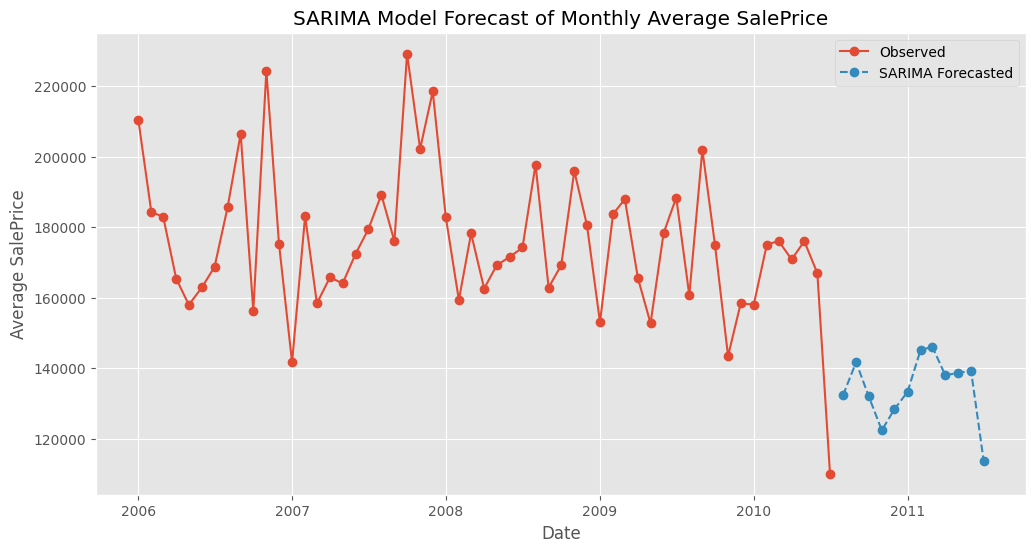

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(monthly_sales_cleaned, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fitted = sarima_model.fit()

sarima_forecast = sarima_fitted.get_forecast(steps=12)
sarima_forecast_mean = sarima_forecast.predicted_mean

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_cleaned, label='Observed', marker='o')
plt.plot(sarima_forecast_mean.index, sarima_forecast_mean, label='SARIMA Forecasted', marker='o', linestyle='--')
plt.title("SARIMA Model Forecast of Monthly Average SalePrice")
plt.xlabel("Date")
plt.ylabel("Average SalePrice")
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


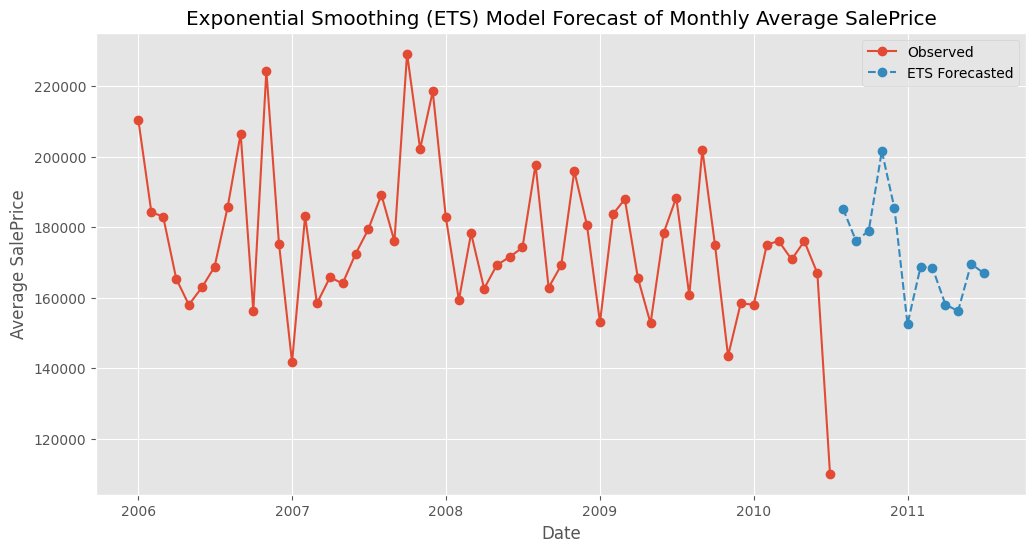

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ets_model = ExponentialSmoothing(monthly_sales_cleaned, trend="add", seasonal="add", seasonal_periods=12)
ets_fitted = ets_model.fit()

ets_forecast = ets_fitted.forecast(steps=12)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_cleaned, label='Observed', marker='o')
plt.plot(ets_forecast.index, ets_forecast, label='ETS Forecasted', marker='o', linestyle='--')
plt.title("Exponential Smoothing (ETS) Model Forecast of Monthly Average SalePrice")
plt.xlabel("Date")
plt.ylabel("Average SalePrice")
plt.legend()
plt.show()

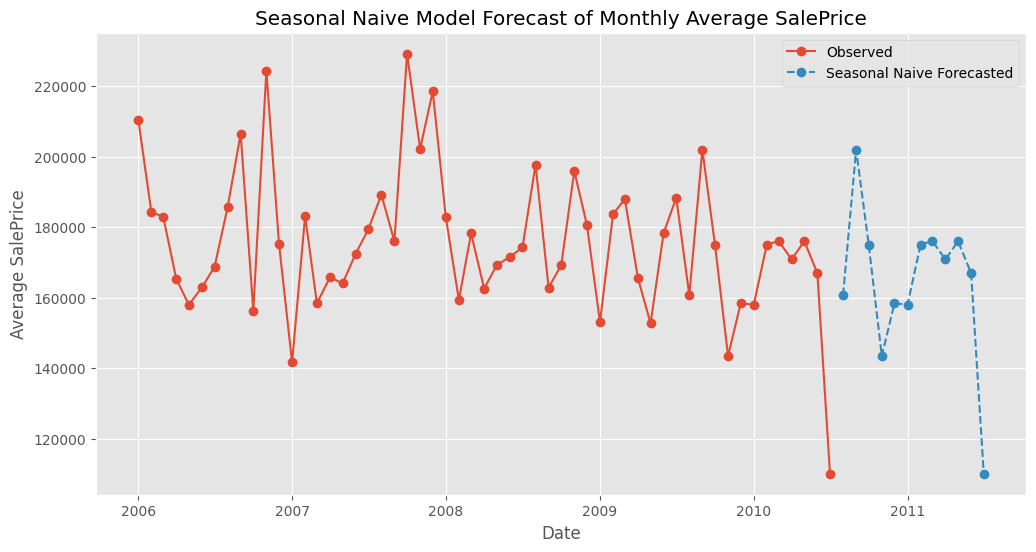

In [21]:
seasonal_naive_forecast = monthly_sales_cleaned[-12:].values  

seasonal_naive_index = pd.date_range(monthly_sales_cleaned.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='MS')

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_cleaned, label='Observed', marker='o')
plt.plot(seasonal_naive_index, seasonal_naive_forecast, label='Seasonal Naive Forecasted', marker='o', linestyle='--')
plt.title("Seasonal Naive Model Forecast of Monthly Average SalePrice")
plt.xlabel("Date")
plt.ylabel("Average SalePrice")
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/forecasting/theta.py:44: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  return DeterministicTerm._extend_index(index, steps)


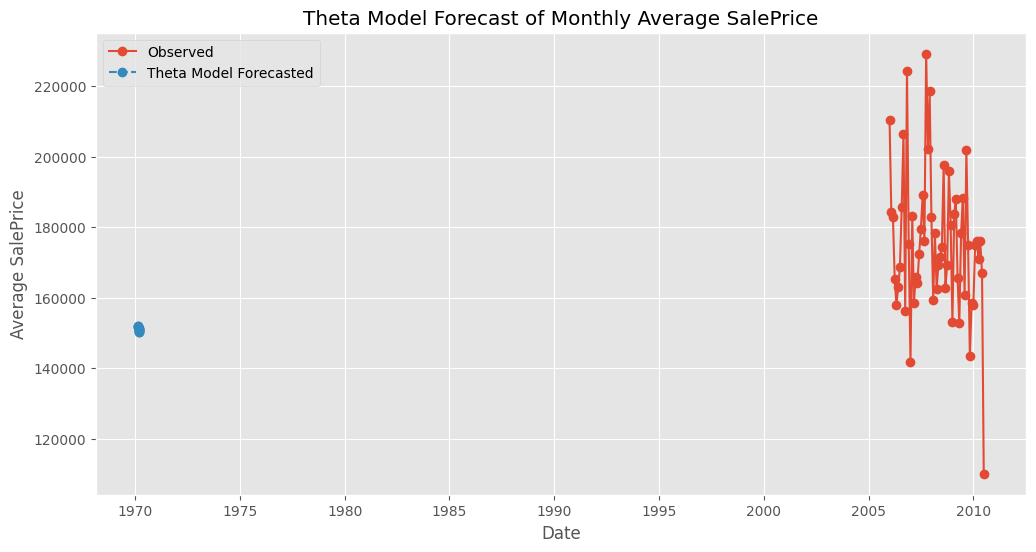

In [22]:
from statsmodels.tsa.forecasting.theta import ThetaModel

theta_model = ThetaModel(monthly_sales_cleaned, period=12)
theta_fitted = theta_model.fit()

theta_forecast = theta_fitted.forecast(steps=12)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_cleaned, label='Observed', marker='o')
plt.plot(theta_forecast.index, theta_forecast, label='Theta Model Forecasted', marker='o', linestyle='--')
plt.title("Theta Model Forecast of Monthly Average SalePrice")
plt.xlabel("Date")
plt.ylabel("Average SalePrice")
plt.legend()
plt.show()

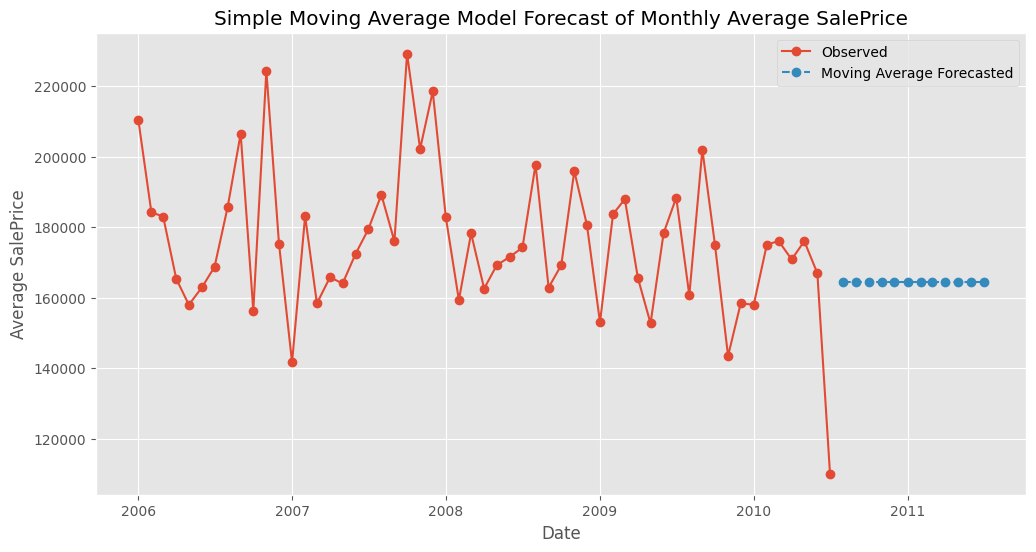

In [23]:
moving_average_forecast = monthly_sales_cleaned.rolling(window=12).mean().iloc[-1]

sma_forecast = [moving_average_forecast] * 12
sma_index = pd.date_range(monthly_sales_cleaned.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='MS')

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_cleaned, label='Observed', marker='o')
plt.plot(sma_index, sma_forecast, label='Moving Average Forecasted', marker='o', linestyle='--')
plt.title("Simple Moving Average Model Forecast of Monthly Average SalePrice")
plt.xlabel("Date")
plt.ylabel("Average SalePrice")
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.17607D+00    |proj g|=  1.43052D-05

At iterate    5    f=  8.90790D+00    |proj g|=  2.48045D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     16      1     0     0   8.445D-06   8.872D+00
  F =   8.8724303183110056     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


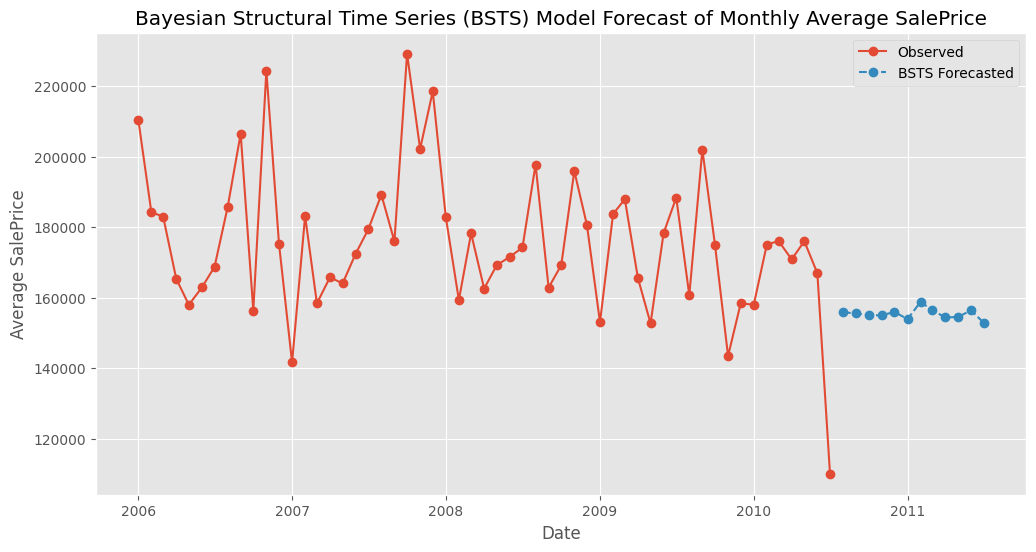

In [24]:
from statsmodels.tsa.statespace.structural import UnobservedComponents

bsts_model = UnobservedComponents(monthly_sales_cleaned, level="local level", seasonal=12)
bsts_fitted = bsts_model.fit()

bsts_forecast = bsts_fitted.get_forecast(steps=12)
bsts_forecast_mean = bsts_forecast.predicted_mean

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_cleaned, label='Observed', marker='o')
plt.plot(bsts_forecast_mean.index, bsts_forecast_mean, label='BSTS Forecasted', marker='o', linestyle='--')
plt.title("Bayesian Structural Time Series (BSTS) Model Forecast of Monthly Average SalePrice")
plt.xlabel("Date")
plt.ylabel("Average SalePrice")
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

historical_index = monthly_sales_cleaned.index[-12:]  
observed_values = monthly_sales_cleaned[-12:].values

forecasts = pd.DataFrame({
    "Observed": observed_values,
    "SARIMA": sarima_forecast_mean[:12].values,  
    "ETS": ets_forecast[:12].values,             
    "SeasonalNaive": seasonal_naive_forecast,    
    "Theta": theta_forecast[:12].values,         
    "SMA": sma_forecast[:12],                   
    "BSTS": bsts_forecast_mean[:12].values      
}, index=historical_index)

metrics = {
    "MAE": {
        "SARIMA": mean_absolute_error(observed_values, forecasts["SARIMA"]),
        "ETS": mean_absolute_error(observed_values, forecasts["ETS"]),
        "SeasonalNaive": mean_absolute_error(observed_values, forecasts["SeasonalNaive"]),
        "Theta": mean_absolute_error(observed_values, forecasts["Theta"]),
        "SMA": mean_absolute_error(observed_values, forecasts["SMA"]),
        "BSTS": mean_absolute_error(observed_values, forecasts["BSTS"]),
    },
    "MAPE": {
        "SARIMA": mean_absolute_percentage_error(observed_values, forecasts["SARIMA"]),
        "ETS": mean_absolute_percentage_error(observed_values, forecasts["ETS"]),
        "SeasonalNaive": mean_absolute_percentage_error(observed_values, forecasts["SeasonalNaive"]),
        "Theta": mean_absolute_percentage_error(observed_values, forecasts["Theta"]),
        "SMA": mean_absolute_percentage_error(observed_values, forecasts["SMA"]),
        "BSTS": mean_absolute_percentage_error(observed_values, forecasts["BSTS"]),
    }
}

metrics_df = pd.DataFrame(metrics)
forecasts, metrics_df

(                 Observed         SARIMA            ETS  SeasonalNaive  \
 SaleDate                                                                 
 2009-08-01  160724.125000  132385.998878  185267.088017  160724.125000   
 2009-09-01  202027.055556  141742.425329  176062.590508  202027.055556   
 2009-10-01  174992.181818  132029.889385  179047.694725  174992.181818   
 2009-11-01  143493.750000  122417.681118  201631.759787  143493.750000   
 2009-12-01  158413.111111  128426.614303  185397.879805  158413.111111   
 2010-01-01  158058.444444  133289.953078  152538.503933  158058.444444   
 2010-02-01  175070.833333  145191.641447  168782.536660  175070.833333   
 2010-03-01  176126.666667  146089.514283  168577.109198  176126.666667   
 2010-04-01  170881.781250  137969.370815  158100.542023  170881.781250   
 2010-05-01  176064.000000  138774.313910  156243.973644  176064.000000   
 2010-06-01  166969.827586  139188.707572  169658.078971  166969.827586   
 2010-07-01  110100.00000